# 1. Data Acquisition 

##  1.1. Merging Rise Datasets

In [153]:
import pandas as pd

In [154]:
df_orders = pd.read_csv('rise_order_import_orders.csv')

In [155]:
df_customers =  pd.read_csv('customers_export.csv')

In [156]:
# DISCUSS ORDERS

In [157]:
df = pd.merge(df_orders, df_customers, on='Email', how='inner')

In [158]:
# Remove duplicate rows based on the 'Paid at' column
df = df.drop_duplicates(subset=['Paid at'])

In [159]:
df.head()

,Order ID,Email,Financial Status,Paid at,Fulfillment Status,Fulfilled at,Currency,Subtotal,Shipping,Taxes,...,Default Address Country Code,Default Address Zip,Default Address Phone,Phone,Accepts SMS Marketing,Total Spent,Total Orders,Note,Tax Exempt,Tags
0,13706,bestdocall@msn.com,refunded,2023-10-15 15:30:25 +0100,cancelled,NaN,GBP,22.0,0.0,0.0,...,GB,HU17 8TU,NaN,NaN,no,396.0,15,NaN,no,NaN
1,13527,bestdocall@msn.com,PAID,2023-09-28 19:27:25 +0100,FULFILLED,2023-09-29 12:01:54 +0100,GBP,22.0,0.0,0.0,...,GB,HU17 8TU,NaN,NaN,no,396.0,15,NaN,no,NaN
2,13284,bestdocall@msn.com,PAID,2023-09-15 15:22:06 +0100,FULFILLED,2023-09-18 14:30:52 +0100,GBP,22.0,0.0,0.0,...,GB,HU17 8TU,NaN,NaN,no,396.0,15,NaN,no,NaN
3,13043,bestdocall@msn.com,PAID,2023-08-28 18:59:19 +0100,FULFILLED,2023-08-29 15:05:56 +0100,GBP,22.0,0.0,0.0,...,GB,HU17 8TU,NaN,NaN,no,396.0,15,NaN,no,NaN
4,12834,bestdocall@msn.com,PAID,2023-08-15 15:19:36 +0100,FULFILLED,2023-08-16 11:11:39 +0100,GBP,22.0,0.0,0.0,...,GB,HU17 8TU,NaN,NaN,no,396.0,15,NaN,no,NaN


In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13613 entries, 0 to 13625
Data columns (total 69 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Order ID                                                        13613 non-null  int64  
 1   Email                                                           13613 non-null  object 
 2   Financial Status                                                13613 non-null  object 
 3   Paid at                                                         13613 non-null  object 
 4   Fulfillment Status                                              13613 non-null  object 
 5   Fulfilled at                                                    13476 non-null  object 
 6   Currency                                                        13613 non-null  object 
 7   Subtotal                                         

In [161]:
unique_shipping_cities = df['Shipping City'].unique()
for city in unique_shipping_cities:    
    if len(df[df['Shipping City'] == city]) > 20:
        print(city)


Hertford
Nottingham
Harpenden
Tunbridge Wells
Sevenoaks
Rickmansworth
LONDON
Plymouth
London
Lincoln
Belfast
Addiscombe
Nantwich
Bristol
Portsmouth
Swansea
St Albans
Sutton
Cambridge
Swindon
Warrington
Chichester
Hove
Colchester
Slaithwaite
Dunfermline
Stockport
York
Cheltenham
Ipswich
Beckenham
St Neots
Leek
ST. ALBANS
Chelmsford
Brighton
Witney
Exeter
Hitchin
Watford
Bath
Hook
Leamington Spa
Woking
Croydon
Bracknell
Reading
Sheffield
High Wycombe
Stratford
Gateshead
Scunthorpe
Penryn
Stoke-on-Trent
Glasgow
SOWERBY BRIDGE
Edinburgh
Mitcham
Cardiff
Aberdeen
Newton Abbot
Oxford
BRISTOL
Strabane
Manchester
Norwich
West Byfleet
Hereford
Alcester
Basingstoke
Doncaster
Newcastle upon Tyne
Sutton Coldfield
Guildford
Ossett
Bexley
Folkestone
Derby
Leicester
Rochester
Southampton
Bramley
Leeds
Thame
Cowes
Hemel Hempstead
Leigh-on-Sea
Romford
Blaby
Northampton
Newport
Welshpool
St Helens
Epsom
Maidstone
Hull
Kent
Bury st edmunds
Anywhere in London
Liverpool
Bournemouth
BFPO
Torquay
Bedford
Addl

In [162]:
df.describe()

,Order ID,Subtotal,Shipping,Taxes,Amount Refunded,Total,Discount Amount,Lineitem quantity,Lineitem price,Channel Order Number,Checkout Form: What tasting notes do you like best?,Total Spent,Total Orders
count,13613.000000,13613.000000,13613.000000,13613.0,13613.000000,13613.000000,13613.000000,13613.000000,13613.000000,13613.000000,0.0,13613.000000,13613.000000
mean,6853.754206,21.991076,0.763072,0.0,0.258751,19.801441,2.952707,1.008962,21.873931,6853.754206,NaN,296.086921,15.469037
std,3958.163346,18.051168,1.552848,0.0,2.886658,17.929035,6.300483,0.365347,17.970776,3958.163346,NaN,305.940120,16.323874
min,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,NaN,0.000000,0.000000
25%,3427.000000,16.990000,0.000000,0.0,0.000000,15.990000,0.000000,1.000000,16.990000,3427.000000,NaN,50.970000,2.000000
50%,6859.000000,19.990000,0.000000,0.0,0.000000,19.940000,0.000000,1.000000,19.990000,6859.000000,NaN,203.880000,11.000000
75%,10280.000000,21.990000,0.000000,0.0,0.000000,19.990000,3.300000,1.000000,21.990000,10280.000000,NaN,444.790000,23.000000
max,13706.000000,240.000000,54.000000,0.0,110.000000,274.000000,215.000000,30.000000,240.000000,13706.000000,NaN,1456.400000,77.000000


## 1.2. Merging with external dataset (gender)

In [163]:
# Load gender names dataset
gender_df = pd.read_csv('gender_names.csv')

# Columns are named correctly
gender_df.columns = ['Name', 'Gender', 'Count', 'Probability']

gender_df.head()

,Name,Gender,Count,Probability
0,James,M,5304407,0.014517
1,John,M,5260831,0.014398
2,Robert,M,4970386,0.013603
3,Michael,M,4579950,0.012534
4,William,M,4226608,0.011567


In [164]:
import pandas as pd

# Drop the 'Count' and 'Probability' columns
gender_df.drop(['Count', 'Probability'], axis=1, inplace=True)

# Columns are named correctly
gender_df.columns = ['Name', 'Gender']

gender_df.head()


,Name,Gender
0,James,M
1,John,M
2,Robert,M
3,Michael,M
4,William,M


In [165]:
# Merge the datasets based on First Name
gender_dict = gender_df.set_index('Name')['Gender'].to_dict()

# Function to get gender based on first name
def get_gender(first_name):
    return gender_dict.get(first_name, 'Unknown')  

df['Gender'] = df['First Name'].apply(get_gender)


In [166]:
df.head()

,Order ID,Email,Financial Status,Paid at,Fulfillment Status,Fulfilled at,Currency,Subtotal,Shipping,Taxes,...,Default Address Zip,Default Address Phone,Phone,Accepts SMS Marketing,Total Spent,Total Orders,Note,Tax Exempt,Tags,Gender
0,13706,bestdocall@msn.com,refunded,2023-10-15 15:30:25 +0100,cancelled,NaN,GBP,22.0,0.0,0.0,...,HU17 8TU,NaN,NaN,no,396.0,15,NaN,no,NaN,F
1,13527,bestdocall@msn.com,PAID,2023-09-28 19:27:25 +0100,FULFILLED,2023-09-29 12:01:54 +0100,GBP,22.0,0.0,0.0,...,HU17 8TU,NaN,NaN,no,396.0,15,NaN,no,NaN,F
2,13284,bestdocall@msn.com,PAID,2023-09-15 15:22:06 +0100,FULFILLED,2023-09-18 14:30:52 +0100,GBP,22.0,0.0,0.0,...,HU17 8TU,NaN,NaN,no,396.0,15,NaN,no,NaN,F
3,13043,bestdocall@msn.com,PAID,2023-08-28 18:59:19 +0100,FULFILLED,2023-08-29 15:05:56 +0100,GBP,22.0,0.0,0.0,...,HU17 8TU,NaN,NaN,no,396.0,15,NaN,no,NaN,F
4,12834,bestdocall@msn.com,PAID,2023-08-15 15:19:36 +0100,FULFILLED,2023-08-16 11:11:39 +0100,GBP,22.0,0.0,0.0,...,HU17 8TU,NaN,NaN,no,396.0,15,NaN,no,NaN,F


## 1.3. Merging with external dataset (city price)¶

In [167]:
regions = {
  "Greater London": [
    "LONDON",
    "Anywhere in London",
    "Richmond",  
  ],
  "South East": [
    "Addiscombe",
    "Beckenham",
    "Bexley",
    "Brighton",
    "Bromley",
    "Bracknell",
    "Chichester",
    "Eastbourne",  
    "Folkestone",
    "Gillingham",  
    "Gravesend",  
    "Guildford",
    "Harpenden",
    "Hemel Hempstead",
    "High Wycombe",
    "Hitchin",
    "Hove",
    "Kent",  
    "Leamington Spa",
    "Maidstone",
    "Mitcham",
    "Newport",  
    "Orpington",  
    "Oxford",
    "Reading",
    "Rochester",
    "Sevenoaks",
    "Slough",
    "Southampton",
    "St Albans",
    "Sutton",
    "Tunbridge Wells",
    "Watford",
    "West Byfleet",
    "Windsor",  
    "Woking",
  ],
  "East of England": [
    "Bedford",
    "Cambridge",
    "Chelmsford",
    "Colchester",
    "Ely",
    "Ipswich",
    "Luton",  
    "Norwich",
    "Peterborough",
    "St Neots",
  ],
  "South West": [
    "Bath",
    "Bristol",
    "Exeter",
    "Newton Abbot",
    "Plymouth",
    "Portsmouth",
    "Swindon",
    "Torquay",  
  ],
  "West Midlands": [
    "Birmingham",
    "Stoke-on-Trent",
    "Wolverhampton",  
  ],
  "North West": [
    "Liverpool",
    "Manchester",
    "Warrington",
    "Stockport",
  ],
  "East Midlands": [
    "Lincoln",
    "Nottingham",
  ],
  "Yorkshire and the Humber": [
    "Doncaster",
    "Hull",
    "Leeds",
    "Sheffield",
  ],
  "North East": [
    "Gateshead",
    "Newcastle upon Tyne",
    "Scunthorpe",
  ],
  "Wales": [
    "Cardiff",
    "Swansea",
    "Welshpool",
  ],
  "Scotland": [
    "Aberdeen",
    "Dunfermline",
    "Edinburgh",
    "Glasgow",
    "SOWERBY BRIDGE",  
  ],
  "Northern Ireland": [
    "Belfast",
    "Lisburn",
    "Strabane",  
  ],
  "Uncategorized": [
    "Blaby",
    "BFPO",  
    "Bury st edmunds",  
    "Cowes", 
    "Hook",  
    "Leek",  
    "Leicestershire",  
    "Macclesfield",  
    "Northampton",
    "Ossett", 
    "Romford",  
    "Salfords",  
    "Surbiton",  
    "Thame", 
    "Ware", 
    "Waterlooville",  
  ],
}


In [168]:
# Assign regions based on city names
for region, cities in regions.items():
    df.loc[df['Shipping City'].isin(cities), 'Region'] = region

north_east_df = df[df['Region'] == 'North East']
north_west_df = df[df['Region'] == 'North West']
yorkshire_df = df[df['Region'] == 'Yorkshire and The Humber']
east_midlands_df = df[df['Region'] == 'East Midlands']
west_midlands_df = df[df['Region'] == 'West Midlands']
east_df = df[df['Region'] == 'East']
london_df = df[df['Region'] == 'London']
south_east_df = df[df['Region'] == 'South East']
south_west_df = df[df['Region'] == 'South West']

In [169]:
region_df = pd.read_csv('uk_by_region.csv', delimiter=';')
region_df

,"First-time buyer average house price in the United Kingdom (UK) from 2015 to 2023, by region (in GBP)",Greater London,South East,East of England,United Kingdom,South West,East Midlands,West Midlands,North West,Wales,Yorkshire and the Humber,Scotland,Northern Ireland,North East
0,2015,367 990,242 111,178 305,190 180,183 408,138 922,147 554,132 948,124 817,129 326,133 178,108 542,118 254
1,2016,402 692,272 777,196 367,205 170,200 465,153 779,159 732,144 367,133 730,135 719,137 188,115 269,124 117
2,2017,422 580,278 749,207 103,207 693,205 333,163 005,168 627,149 990,139 875,139 970,140 010,120 648,126 437
3,2018,426 857,279 349,210 874,212 473,210 200,165 399,174 908,149 089,144 542,142 638,141 671,129 615,126 104
4,2019,453 385,295 348,220 719,231 455,221 357,181 876,185 091,163 459,153 267,156 232,152 728,136 850,136 104
5,2020,488 771,322 386,297 548,256 057,239 434,199 503,204 948,175 389,165 272,167 267,154 821,147 394,145 254
6,2021,475 819,320 591,303 166,264 140,252 263,210 203,209 270,189 588,180 392,177 683,166 919,156 594,151 814
7,2022,518 168,364 048,338 251,302 010,282 705,240 346,236 583,214 400,200 390,203 356,191 159,171 590,177 032
8,2023,492 234,353 724,327 926,288 136,273 968,235 941,236 253,215 655,199 930,204 178,188 670,174 337,174 693


In [170]:
# first row
first_row = region_df.iloc[0:1]

#row for the year 2023
last_row = region_df.iloc[1:0]

new_df = pd.concat([first_row, last_row], ignore_index=True)
new_df


,"First-time buyer average house price in the United Kingdom (UK) from 2015 to 2023, by region (in GBP)",Greater London,South East,East of England,United Kingdom,South West,East Midlands,West Midlands,North West,Wales,Yorkshire and the Humber,Scotland,Northern Ireland,North East
0,2015,367 990,242 111,178 305,190 180,183 408,138 922,147 554,132 948,124 817,129 326,133 178,108 542,118 254


In [171]:
import pandas as pd

# dictionary 
data = {
    'City': ['Greater London', 'South East', 'East of England', 'United Kingdom', 
             'South West', 'East Midlands', 'West Midlands', 'North West', 
             'Wales', 'Yorkshire and the Humber', 'Scotland', 'Northern Ireland', 
             'North East'],
    'Price': [367990, 242111, 178305, 190180, 183408, 138922, 147554, 
                    132948, 124817, 129326, 133178, 108542, 118254]
}

# DataFrame from the dictionary
df_region = pd.DataFrame(data)

print(df_region)


                        City   Price
0             Greater London  367990
1                 South East  242111
2            East of England  178305
3             United Kingdom  190180
4                 South West  183408
5              East Midlands  138922
6              West Midlands  147554
7                 North West  132948
8                      Wales  124817
9   Yorkshire and the Humber  129326
10                  Scotland  133178
11          Northern Ireland  108542
12                North East  118254


In [172]:
# Sorting the DataFrame by 'Price (GBP)' in descending order 
df_region = df_region.sort_values(by='Price', ascending=False).reset_index(drop=True)

# Adding 'Rank' 
df_region['Rank'] = df_region.index + 1

print(df_region)

                        City   Price  Rank
0             Greater London  367990     1
1                 South East  242111     2
2             United Kingdom  190180     3
3                 South West  183408     4
4            East of England  178305     5
5              West Midlands  147554     6
6              East Midlands  138922     7
7                   Scotland  133178     8
8                 North West  132948     9
9   Yorkshire and the Humber  129326    10
10                     Wales  124817    11
11                North East  118254    12
12          Northern Ireland  108542    13


In [173]:
def wealth_category(rank):
  if rank <= 3:
    return 'High'
  elif rank <= 8:
    return 'Medium'
  else:
    return 'Low'

df_region['Income Category Region'] = df_region['Rank'].apply(wealth_category)
df_region

,City,Price,Rank,Income Category Region
0,Greater London,367990,1,High
1,South East,242111,2,High
2,United Kingdom,190180,3,High
3,South West,183408,4,Medium
4,East of England,178305,5,Medium
5,West Midlands,147554,6,Medium
6,East Midlands,138922,7,Medium
7,Scotland,133178,8,Medium
8,North West,132948,9,Low
9,Yorkshire and the Humber,129326,10,Low


In [174]:
#MERGE
df_region = df_region.rename(columns={'City': 'Region'})
df_region

,Region,Price,Rank,Income Category Region
0,Greater London,367990,1,High
1,South East,242111,2,High
2,United Kingdom,190180,3,High
3,South West,183408,4,Medium
4,East of England,178305,5,Medium
5,West Midlands,147554,6,Medium
6,East Midlands,138922,7,Medium
7,Scotland,133178,8,Medium
8,North West,132948,9,Low
9,Yorkshire and the Humber,129326,10,Low


In [175]:
df = df.merge(df_region, left_on='Region', right_on='Region', how='left')
df

,Order ID,Email,Financial Status,Paid at,Fulfillment Status,Fulfilled at,Currency,Subtotal,Shipping,Taxes,...,Total Spent,Total Orders,Note,Tax Exempt,Tags,Gender,Region,Price,Rank,Income Category Region
0,13706,bestdocall@msn.com,refunded,2023-10-15 15:30:25 +0100,cancelled,NaN,GBP,22.00,0.0,0.0,...,396.00,15,NaN,no,NaN,F,NaN,NaN,NaN,NaN
1,13527,bestdocall@msn.com,PAID,2023-09-28 19:27:25 +0100,FULFILLED,2023-09-29 12:01:54 +0100,GBP,22.00,0.0,0.0,...,396.00,15,NaN,no,NaN,F,NaN,NaN,NaN,NaN
2,13284,bestdocall@msn.com,PAID,2023-09-15 15:22:06 +0100,FULFILLED,2023-09-18 14:30:52 +0100,GBP,22.00,0.0,0.0,...,396.00,15,NaN,no,NaN,F,NaN,NaN,NaN,NaN
3,13043,bestdocall@msn.com,PAID,2023-08-28 18:59:19 +0100,FULFILLED,2023-08-29 15:05:56 +0100,GBP,22.00,0.0,0.0,...,396.00,15,NaN,no,NaN,F,NaN,NaN,NaN,NaN
4,12834,bestdocall@msn.com,PAID,2023-08-15 15:19:36 +0100,FULFILLED,2023-08-16 11:11:39 +0100,GBP,22.00,0.0,0.0,...,396.00,15,NaN,no,NaN,F,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13608,8,admin@thenutrientgap.com,PAID,2020-06-17 19:32:46 +0100,FULFILLED,2020-06-20 14:55:20 +0100,GBP,18.99,0.0,0.0,...,18.99,1,NaN,no,NaN,Unknown,NaN,NaN,NaN,NaN
13609,7,m.g.healy42@googlemail.com,PAID,2020-06-17 09:44:39 +0100,FULFILLED,2020-06-20 14:55:13 +0100,GBP,18.99,0.0,0.0,...,18.99,1,NaN,no,NaN,F,NaN,NaN,NaN,NaN
13610,4,sarahclaing89@gmail.com,PAID,2020-06-06 14:37:59 +0100,FULFILLED,2020-06-20 14:54:49 +0100,GBP,18.99,0.0,0.0,...,18.99,1,NaN,no,NaN,M,Scotland,133178.0,8.0,Medium
13611,2,dan@fivetwentythree.co.uk,PAID,2020-05-27 10:46:16 +0100,FULFILLED,2021-10-03 15:44:51 +0100,GBP,0.30,0.0,0.0,...,0.60,2,NaN,no,NaN,Unknown,NaN,NaN,NaN,NaN


In [176]:
import pandas as pd
city_df = pd.read_csv('House_prices_UK.csv', delimiter=';')

In [177]:
city_df

,"Average house price and percentage change from the prevous year in the United Kingdom (UK) in August 2023, by city (in GBP)",Average price,Annual percentage change
0,London,535 597,"-1,40"
1,Cambridge,513 078,"-0,40"
2,Oxford,508 305,"6,80"
3,Bristol,352 156,"0,60"
4,Edinburgh,335 815,"0,90"
5,Bournemouth,334 426,"-2,90"
6,United Kingdom,291 044,"0,20"
7,Cardiff,264 380,"2,60"
8,Portsmouth,253 407,"-0,50"
9,Southampton,249 476,"1,50"


In [178]:
city_df = city_df.sort_values(by='Average price', ascending=False).reset_index(drop=True)
city_df['Rank'] = city_df.index + 1

city_df

,"Average house price and percentage change from the prevous year in the United Kingdom (UK) in August 2023, by city (in GBP)",Average price,Annual percentage change,Rank
0,London,535 597,"-1,40",1
1,Cambridge,513 078,"-0,40",2
2,Oxford,508 305,"6,80",3
3,Bristol,352 156,"0,60",4
4,Edinburgh,335 815,"0,90",5
5,Bournemouth,334 426,"-2,90",6
6,United Kingdom,291 044,"0,20",7
7,Cardiff,264 380,"2,60",8
8,Portsmouth,253 407,"-0,50",9
9,Southampton,249 476,"1,50",10


In [179]:
# Define wealth categories (based on rank)
def wealth_category(rank):
    if rank <= 5:
        return 'High'
    elif rank <= 15:
        return 'Medium'
    else:
        return 'Low'

city_df['Income Category City'] = city_df['Rank'].apply(wealth_category)

In [180]:
#MERGE
city_df = city_df.rename(columns={'Average house price and percentage change from the prevous year in the United Kingdom (UK) in August 2023, by city (in GBP)': 'Shipping City'})

In [181]:
df = df.merge(city_df[['Shipping City', 'Income Category City']], on='Shipping City', how='left')
df

,Order ID,Email,Financial Status,Paid at,Fulfillment Status,Fulfilled at,Currency,Subtotal,Shipping,Taxes,...,Total Orders,Note,Tax Exempt,Tags,Gender,Region,Price,Rank,Income Category Region,Income Category City
0,13706,bestdocall@msn.com,refunded,2023-10-15 15:30:25 +0100,cancelled,NaN,GBP,22.00,0.0,0.0,...,15,NaN,no,NaN,F,NaN,NaN,NaN,NaN,NaN
1,13527,bestdocall@msn.com,PAID,2023-09-28 19:27:25 +0100,FULFILLED,2023-09-29 12:01:54 +0100,GBP,22.00,0.0,0.0,...,15,NaN,no,NaN,F,NaN,NaN,NaN,NaN,NaN
2,13284,bestdocall@msn.com,PAID,2023-09-15 15:22:06 +0100,FULFILLED,2023-09-18 14:30:52 +0100,GBP,22.00,0.0,0.0,...,15,NaN,no,NaN,F,NaN,NaN,NaN,NaN,NaN
3,13043,bestdocall@msn.com,PAID,2023-08-28 18:59:19 +0100,FULFILLED,2023-08-29 15:05:56 +0100,GBP,22.00,0.0,0.0,...,15,NaN,no,NaN,F,NaN,NaN,NaN,NaN,NaN
4,12834,bestdocall@msn.com,PAID,2023-08-15 15:19:36 +0100,FULFILLED,2023-08-16 11:11:39 +0100,GBP,22.00,0.0,0.0,...,15,NaN,no,NaN,F,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13608,8,admin@thenutrientgap.com,PAID,2020-06-17 19:32:46 +0100,FULFILLED,2020-06-20 14:55:20 +0100,GBP,18.99,0.0,0.0,...,1,NaN,no,NaN,Unknown,NaN,NaN,NaN,NaN,NaN
13609,7,m.g.healy42@googlemail.com,PAID,2020-06-17 09:44:39 +0100,FULFILLED,2020-06-20 14:55:13 +0100,GBP,18.99,0.0,0.0,...,1,NaN,no,NaN,F,NaN,NaN,NaN,NaN,NaN
13610,4,sarahclaing89@gmail.com,PAID,2020-06-06 14:37:59 +0100,FULFILLED,2020-06-20 14:54:49 +0100,GBP,18.99,0.0,0.0,...,1,NaN,no,NaN,M,Scotland,133178.0,8.0,Medium,High
13611,2,dan@fivetwentythree.co.uk,PAID,2020-05-27 10:46:16 +0100,FULFILLED,2021-10-03 15:44:51 +0100,GBP,0.30,0.0,0.0,...,2,NaN,no,NaN,Unknown,NaN,NaN,NaN,NaN,High


# 2. Data preparation (cleaning)


In [182]:
import pandas as pd
#Calculate the total number of orders for each customer
total_orders_per_customer = df.groupby('Customer ID')['Order ID'].count()

# Create a dictionary to map Customer ID to Total Orders
total_orders_dict = total_orders_per_customer.to_dict()

# Map total orders
df['Total Orders'] = df['Customer ID'].map(total_orders_dict)

# Verify the updated datarame
print(df[['Customer ID', 'Order ID', 'Total Orders']].head())

      Customer ID  Order ID  Total Orders
0  '7335002865975     13706             7
1  '7335002865975     13527             7
2  '7335002865975     13284             7
3  '7335002865975     13043             7
4  '7335002865975     12834             7


In [183]:
import pandas as pd

irrelevant_columns = ['Private Notes', 'Checkout Form: Referred by a friend? Let us know who! ',
                      'Checkout Form: What tasting notes do you like best? (optional)', 
                      'Checkout Form: What tasting notes do you like best?', 
                      'Note', 'Default Address Company', 'Subtotal', 'Lineitem price', 'Taxes', 'Lineitem taxable', 'Accepts SMS Marketing']

# existing columns ->  drop them
existing_columns = [col for col in irrelevant_columns if col in df.columns]
df = df.drop(columns=existing_columns)

### 2.2. Change into numeric format

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13613 entries, 0 to 13612
Data columns (total 64 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Order ID                       13613 non-null  int64  
 1   Email                          13613 non-null  object 
 2   Financial Status               13613 non-null  object 
 3   Paid at                        13613 non-null  object 
 4   Fulfillment Status             13613 non-null  object 
 5   Fulfilled at                   13476 non-null  object 
 6   Currency                       13613 non-null  object 
 7   Shipping                       13613 non-null  float64
 8   Amount Refunded                13613 non-null  float64
 9   Total                          13613 non-null  float64
 10  Discount Code                  3285 non-null   object 
 11  Discount Amount                13613 non-null  float64
 12  Shipping Method                13576 non-null 

In [185]:
df['Financial_Binary'] = df['Financial Status'].map({'refunded': 0, 'PAID': 1, 'Unknown': 2})
df['Fulfilled_Binary'] = df['Fulfilled at'].notna().astype(int)
df['Gender_Binary'] = df['Gender'].map({'M': 0, 'F': 1, 'Unknown': 2})
df['Email_Binary'] = df['Accepts Email Marketing'].map({'no': 0, 'yes': 1})

## 2.3 Creating a 'numeric df'

In [186]:
# Select only numeric columns
# binary_df = df.select_dtypes(include=['number'])
# binary_dfnumeric_df.head()

## 2.4. Get rid out outliers 

In [187]:
from scipy import stats
import numpy as np
# Select only numeric columns (excluding timedelta columns)
numeric_columns = df.select_dtypes(include=['number']).columns
timedelta_columns = df.select_dtypes(include=['timedelta']).columns
numeric_columns = numeric_columns.difference(timedelta_columns)

# Drop rows with missing values in numeric columns
cluster_df = df.dropna(subset=numeric_columns)

# Calculate Z-scores for each data point in numeric columns
z_scores = stats.zscore(cluster_df[numeric_columns])

# Absolute z-score > 3 is considered as an outlier
outlier_indices = (np.abs(z_scores) > 3).any(axis=1)

# Remove outliers from the DataFrame
cluster_df = cluster_df[~outlier_indices]


# 3. Market statistics

In [188]:
market_statistics = {
    'Weekly household consumption of coffee in the UK': {
        '2006': 17,
        '2007': 17,
        '2008': 17,
        '2009': 18,
        '2010': 20,
        '2011': 18,
        '2012': 19,
        '2013': 19,
        '2014': 20,
        '2015': 21,
        '2016': 22,
        '2017': 21,
        '2018': 23,
        '2019': 24,
        '2020': 25,
        '2021': 29,
        '2022': 27,
    },
    'Consumer spending on coffee, tea and cocoa in the UK (in million GBP)': {
        '2005': 1338,
        '2006': 1363,
        '2007': 1437,
        '2008': 1463,
        '2009': 1600,
        '2010': 1690,
        '2011': 1799,
        '2012': 1890,
        '2013': 1960,
        '2014': 1991,
        '2015': 2004,
        '2016': 2065,
        '2017': 2205,
        '2018': 2332,
        '2019': 2481,
        '2020': 2726,
        '2021': 3045,
        '2022': 2998,
    },
    'Average expenditure per person per week on coffee in the UK (pence)': {
        '2006': 21,
        '2007': 22,
        '2008': 24,
        '2009': 26,
        '2010': 26,
        '2011': 27,
        '2012': 32,
        '2013': 31,
        '2014': 34,
        '2015': 37,
        '2016': 37,
        '2017': 36,
        '2018': 41,
        '2019': 42,
        '2020': 44,
        '2021': 49,
        '2022': 49,
    },
    'Consumer price index (CPI) of coffee, tea and cocoa in the UK': {
        '2003': 70.20,
        '2004': 68.00,
        '2005': 68.10,
        '2006': 71.50,
        '2007': 74.10,
        '2008': 78.10,
        '2009': 85.60,
        '2010': 90.80,
        '2011': 99.40,
        '2012': 102.60,
        '2013': 103.50,
        '2014': 102.10,
        '2015': 100.00,
        '2016': 100.00,
        '2017': 105.30,
        '2018': 106.90,
        '2019': 106.30,
        '2020': 104.70,
        '2021': 102.60,
        '2022': 111.70,
    }
}

print("Weekly household consumption of coffee in the UK in 2020:", market_statistics['Weekly household consumption of coffee in the UK']['2021'])
print("Consumer spending on coffee, tea and cocoa in the UK in 2022 (in million GBP):", market_statistics['Consumer spending on coffee, tea and cocoa in the UK (in million GBP)']['2022'])
print("Average expenditure per person per week on coffee in the UK in 2021 (pence):", market_statistics['Average expenditure per person per week on coffee in the UK (pence)']['2022'])
print("CPI of coffee, tea and cocoa in the UK in 2022:", market_statistics['Consumer price index (CPI) of coffee, tea and cocoa in the UK']['2022'])


Weekly household consumption of coffee in the UK in 2020: 29
Consumer spending on coffee, tea and cocoa in the UK in 2022 (in million GBP): 2998
Average expenditure per person per week on coffee in the UK in 2021 (pence): 49
CPI of coffee, tea and cocoa in the UK in 2022: 111.7


# 4. Exploratory Data Analysis (EDA)

## 4.1. Customer Lifespan

In [189]:
import pandas as pd

df['Created at'] = pd.to_datetime(df['Created at'], utc=True)

customer_order_dates = df.groupby('Customer ID')['Created at'].agg(['min', 'max'])

customer_order_dates['Customer Lifespan'] = (customer_order_dates['max'] - customer_order_dates['min']).dt.days / 365.25

print(customer_order_dates.columns)

df = df.merge(customer_order_dates[['Customer Lifespan']], left_on='Customer ID', right_index=True, how='left')

print(df[['Customer ID', 'Created at', 'Customer Lifespan']].head())

Index(['min', 'max', 'Customer Lifespan'], dtype='object')
      Customer ID                Created at  Customer Lifespan
0  '7335002865975 2023-10-15 14:30:25+00:00           1.160849
1  '7335002865975 2023-09-28 18:27:25+00:00           1.160849
2  '7335002865975 2023-09-15 14:22:06+00:00           1.160849
3  '7335002865975 2023-08-28 17:59:19+00:00           1.160849
4  '7335002865975 2023-08-15 14:19:36+00:00           1.160849


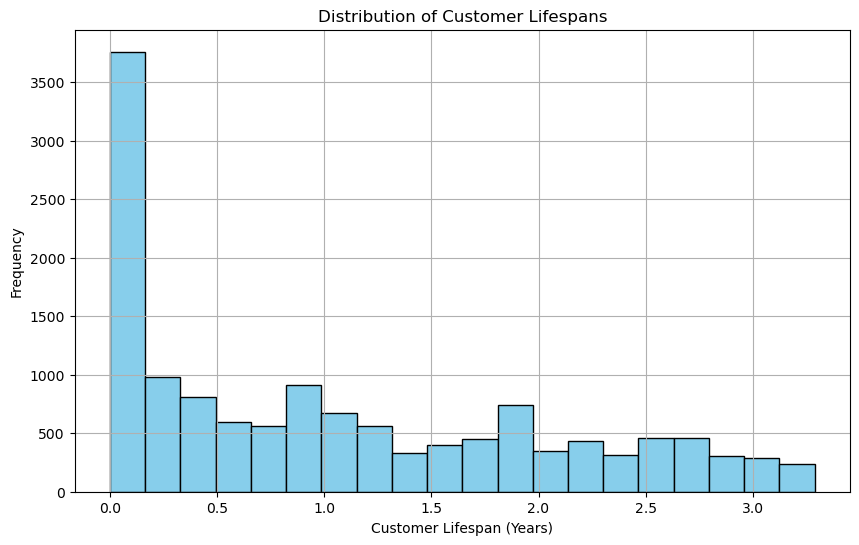

In [190]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['Customer Lifespan'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Customer Lifespans')
plt.xlabel('Customer Lifespan (Years)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


### At which point are they most likely to churn 

In [191]:
import pandas as pd
import matplotlib.pyplot as plt

df['Created at'] = pd.to_datetime(df['Created at'], utc=True)

# Identify churn points (CLS < than 6 months)
churn_threshold_months = 6
churned_customers = customer_order_dates[customer_order_dates['Customer Lifespan'] < churn_threshold_months]
churn_rate = len(churned_customers) / len(customer_order_dates) * 100

print(f"Churn rate (customers with lifespan < {churn_threshold_months} months): {churn_rate:.2f}%")

# Trial period analysis
trial_periods = [1, 2, 3, 4, 5, 6]  # Trial periods in months

for period in trial_periods:
    trial_customers = customer_order_dates[customer_order_dates['Customer Lifespan'] >= period]
    retention_rate = len(trial_customers) / len(customer_order_dates) * 100
    print(f"Retention rate (trial period >= {period} months): {retention_rate:.2f}%")

Churn rate (customers with lifespan < 6 months): 100.00%
Retention rate (trial period >= 1 months): 7.24%
Retention rate (trial period >= 2 months): 2.40%
Retention rate (trial period >= 3 months): 0.34%
Retention rate (trial period >= 4 months): 0.00%
Retention rate (trial period >= 5 months): 0.00%
Retention rate (trial period >= 6 months): 0.00%


## 4.2. Average Customer Statistics 

In [192]:
#  lists to store per customer coffee consumption statistics
customer_ids = []
total_spent_on_coffee = []
total_coffee_orders = []

# Iterate over each customer
for index, row in df.iterrows():
    customer_id = row['Customer ID']
    total_spent = row['Total Spent']
    total_orders = row['Total Orders']
    
    # Append customer ID
    customer_ids.append(customer_id)
    
    # Append total spent on coffee
    total_spent_on_coffee.append(total_spent)
    
    # Append total number of coffee orders
    total_coffee_orders.append(total_orders)

# Create a DataFrame to store per customer coffee consumption statistics
customer_coffee_consumption = pd.DataFrame({
    'Customer ID': customer_ids,
    'Total Spent on Coffee': total_spent_on_coffee,
    'Total Coffee Orders': total_coffee_orders
})

# Print the per customer coffee consumption statistics
print("Per Customer Coffee Consumption Statistics:")
print(customer_coffee_consumption)


Per Customer Coffee Consumption Statistics:
          Customer ID  Total Spent on Coffee  Total Coffee Orders
0      '7335002865975                 396.00                    7
1      '7335002865975                 396.00                    7
2      '7335002865975                 396.00                    7
3      '7335002865975                 396.00                    7
4      '7335002865975                 396.00                    7
...               ...                    ...                  ...
13608  '7343716499767                  18.99                    1
13609  '7343716434231                  18.99                    1
13610  '7344101294391                  18.99                    1
13611  '7346100273463                   0.60                    2
13612  '7346100273463                   0.60                    2

[13613 rows x 3 columns]


In [193]:
# Calculate aggregate metrics from customer data
total_customers = len(customer_coffee_consumption)
total_spent_on_coffee = customer_coffee_consumption['Total Spent on Coffee'].sum()
total_coffee_orders = customer_coffee_consumption['Total Coffee Orders'].sum()
average_spent_per_customer = total_spent_on_coffee / total_customers
average_orders_per_customer = total_coffee_orders / total_customers

print("Aggregate Metrics from Customer Data:")
print("Total customers:", total_customers)
print("Total spent on coffee:", total_spent_on_coffee)
print("Total coffee orders:", total_coffee_orders)
print("Average spent per customer on coffee:", average_spent_per_customer)
print("Average orders per customer:", average_orders_per_customer)


Aggregate Metrics from Customer Data:
Total customers: 13613
Total spent on coffee: 4030631.25
Total coffee orders: 175975
Average spent per customer on coffee: 296.0869205906119
Average orders per customer: 12.926981561742451


In [194]:
# Extract relevant market statistics for comparison
market_total_spent_on_coffee = market_statistics['Consumer spending on coffee, tea and cocoa in the UK (in million GBP)']['2022']


print("\nMarket Statistics:")
print("Total spent on coffee (2022):",total_spent_on_coffee, "vs", market_total_spent_on_coffee)

print("\nComparison with Market Statistics:")
print("Total spent on coffee (Customer vs Market):", average_spent_per_customer, "vs", market_total_spent_on_coffee)



Market Statistics:
Total spent on coffee (2022): 4030631.25 vs 2998

Comparison with Market Statistics:
Total spent on coffee (Customer vs Market): 296.0869205906119 vs 2998


## 4.3. Gender Analysis

In [195]:
# Drop the extra 'Name' column from the merge
# df.drop(columns=['Name', 'Count', 'Probability'], inplace=True)

In [196]:
df['Gender'].fillna('Unknown', inplace=True)

In [197]:
gender_counts = df['Gender'].value_counts()
print("Gender counts:")
print(gender_counts)

Gender counts:
F          6253
M          4878
Unknown    2482
Name: Gender, dtype: int64


## 4.4. Location analysis

In [198]:
filtered_df = df.loc[df['Shipping City'] == 'London']

In [199]:
london_inner_postcodes = ["E", "EC", "N", "NW", "SE", "SW", "W", "WC"]

central_london_filter = df['Shipping Zip'].str.startswith(tuple(london_inner_postcodes), na=False)

central_london_df = df[central_london_filter]

In [200]:
non_central_london_df = df[~central_london_filter]

In [201]:
#Add tis to the main dataset 
df['Inner London'] = central_london_filter.map({True: 'Yes', False: 'No'})
df['Outer London'] = central_london_filter.map({True: 'No', False: 'Yes'})

In [202]:
# Count the number of central and non-central London customers
num_central_london = central_london_df.shape[0]
num_non_central_london = non_central_london_df.shape[0]

print(f"Number of central London customers: {num_central_london}")
print(f"Number of non-central London customers: {num_non_central_london}")

Number of central London customers: 4967
Number of non-central London customers: 8646


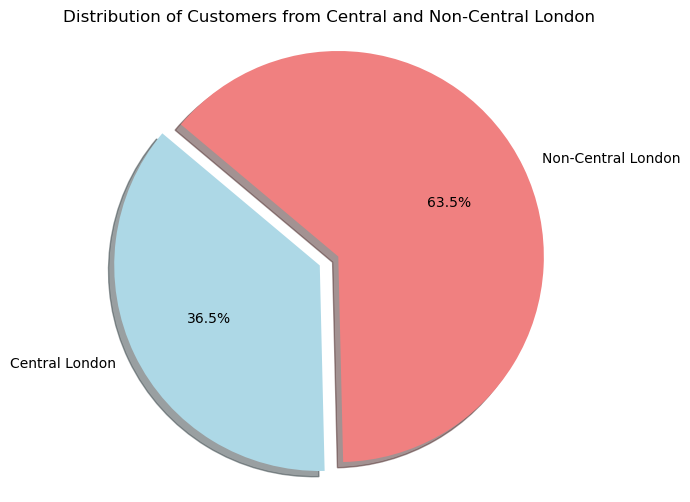

In [203]:
import matplotlib.pyplot as plt

# Visualise the distribution
labels = ['Central London', 'Non-Central London']
sizes = [num_central_london, num_non_central_london]
colors = ['lightblue', 'lightcoral']
explode = (0.1, 0)  

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  
plt.title('Distribution of Customers from Central and Non-Central London')
plt.show()

### 4.4.1. How many people used discounts in inner and outer london 

In [204]:
# Count the number of people who used discount codes in central and non-central London
central_london_discount_users = central_london_df['Discount Code'].notnull().sum()
non_central_london_discount_users = non_central_london_df['Discount Code'].notnull().sum()

In [205]:
print(f"Number of central London customers who used discount codes: {central_london_discount_users}")
print(f"Number of non-central London customers who used discount codes: {non_central_london_discount_users}")

Number of central London customers who used discount codes: 1236
Number of non-central London customers who used discount codes: 2049


In [206]:
# Calculate the percentage of customers who used discount codes
central_london_discount_percentage = (central_london_discount_users / num_central_london) * 100 if num_central_london > 0 else 0
non_central_london_discount_percentage = (non_central_london_discount_users / num_non_central_london) * 100 if num_non_central_london > 0 else 0

# Calculate the percentage of customers who did not use discount codes
central_london_no_discount_percentage = 100 - central_london_discount_percentage
non_central_london_no_discount_percentage = 100 - non_central_london_discount_percentage

print(f"Percentage of central London customers who used discount codes: {central_london_discount_percentage:.2f}%")
print(f"Percentage of central London customers who did not use discount codes: {central_london_no_discount_percentage:.2f}%")
print(f"Percentage of non-central London customers who used discount codes: {non_central_london_discount_percentage:.2f}%")
print(f"Percentage of non-central London customers who did not use discount codes: {non_central_london_no_discount_percentage:.2f}%")

Percentage of central London customers who used discount codes: 24.88%
Percentage of central London customers who did not use discount codes: 75.12%
Percentage of non-central London customers who used discount codes: 23.70%
Percentage of non-central London customers who did not use discount codes: 76.30%


#### 4.4.1.1. Data cleaning including London

In [207]:
df['Inner_London_Binary'] = df['Inner London'].map({'No': 0, 'Yes': 1, 'Unknown': 2})

### 4.4.2.Top postcodes of people in inner and outter London

In [208]:
top_inner_london_postcodes = central_london_df['Shipping Zip'].value_counts().head(10)
top_inner_london_postcodes

E17 5QT     58
SW4 8JF     52
SW9 0HP     48
E2 8PH      41
SW11 7AS    38
SE13 7DF    37
WD24 7PB    36
SW10 9BP    35
N4 2HE      34
SE240NS     34
Name: Shipping Zip, dtype: int64

In [209]:
london_outer_postcodes = ["BR", "CR", "DA", "EN", "HA", "IG", "KT", "RM", "SM", "TN", "TW", "UB", "WD"]

outer_london_filter = df['Shipping Zip'].str.startswith(tuple(london_outer_postcodes), na=False)
outer_london_df = df[outer_london_filter]

top_outer_london_postcodes = outer_london_df['Shipping Zip'].value_counts().head(10)
top_outer_london_postcodes

TN2 5LP     64
WD24 7PB    36
CR0 6RP     34
DA5 3LN     33
WD17 3FA    32
TN13        27
KT18 7BU    25
SM3 8EF     25
DA1 5SH     23
IG9 5QX     21
Name: Shipping Zip, dtype: int64

## 4.5. Fulfillment Time Feature

In [210]:
import pandas as pd

# Convert 'Paid at' and 'Fulfilled at' columns to datetime objects
df['Paid at'] = pd.to_datetime(df['Paid at'])
df['Fulfilled at'] = pd.to_datetime(df['Fulfilled at'])

# Calculate duration between 'Paid at' and 'Fulfilled at'
df['Fulfillment Time'] = df['Fulfilled at'] - df['Paid at']

print(df)


       Order ID                       Email Financial Status  \
0         13706          bestdocall@msn.com         refunded   
1         13527          bestdocall@msn.com             PAID   
2         13284          bestdocall@msn.com             PAID   
3         13043          bestdocall@msn.com             PAID   
4         12834          bestdocall@msn.com             PAID   
...         ...                         ...              ...   
13608         8    admin@thenutrientgap.com             PAID   
13609         7  m.g.healy42@googlemail.com             PAID   
13610         4     sarahclaing89@gmail.com             PAID   
13611         2   dan@fivetwentythree.co.uk             PAID   
13612         1   dan@fivetwentythree.co.uk             PAID   

                         Paid at Fulfillment Status  \
0      2023-10-15 15:30:25+01:00          cancelled   
1      2023-09-28 19:27:25+01:00          FULFILLED   
2      2023-09-15 15:22:06+01:00          FULFILLED   
3      2023

## 4.6. Income level 

Wealth Category Distribution:
 Medium    1818
High      1770
Low        977
Name: Income Category Region, dtype: int64


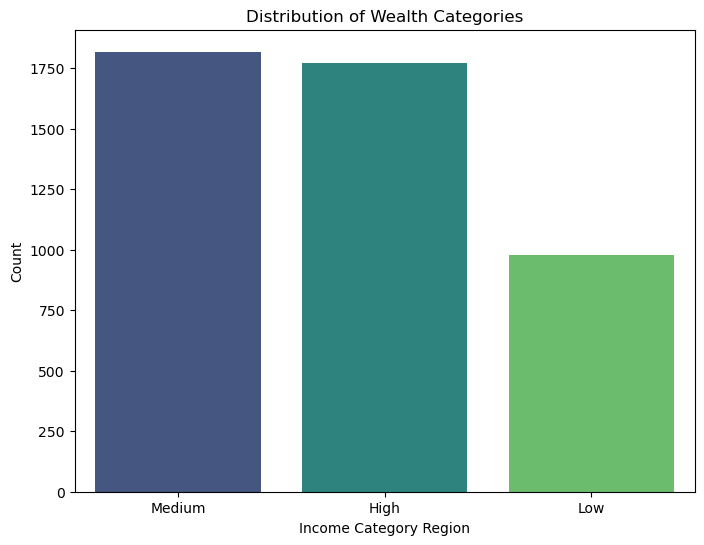

In [211]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

wealth_summary = df['Income Category Region'].value_counts()
print("Wealth Category Distribution:\n", wealth_summary)

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Income Category Region', palette='viridis')
plt.title('Distribution of Wealth Categories')
plt.xlabel('Income Category Region')
plt.ylabel('Count')
plt.show()

Wealth Category Distribution:
 High      3972
Medium     639
Low        631
Name: Income Category City, dtype: int64


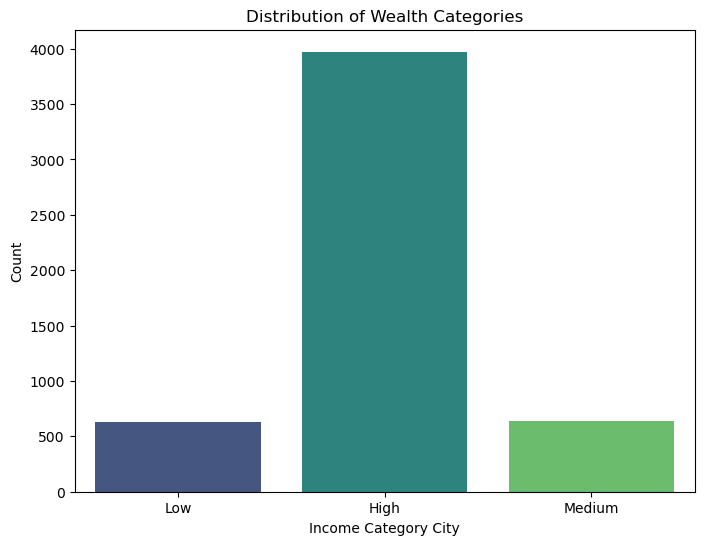

In [212]:
wealth_summary = df['Income Category City'].value_counts()
print("Wealth Category Distribution:\n", wealth_summary)

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Income Category City', palette='viridis')
plt.title('Distribution of Wealth Categories')
plt.xlabel('Income Category City')
plt.ylabel('Count')
plt.show()

In [213]:
df

,Order ID,Email,Financial Status,Paid at,Fulfillment Status,Fulfilled at,Currency,Shipping,Amount Refunded,Total,...,Income Category City,Financial_Binary,Fulfilled_Binary,Gender_Binary,Email_Binary,Customer Lifespan,Inner London,Outer London,Inner_London_Binary,Fulfillment Time
0,13706,bestdocall@msn.com,refunded,2023-10-15 15:30:25+01:00,cancelled,NaN,GBP,0.0,22.0,22.00,...,NaN,0,0,1,0,1.160849,No,Yes,0,NaT
1,13527,bestdocall@msn.com,PAID,2023-09-28 19:27:25+01:00,FULFILLED,2023-09-29 12:01:54+01:00,GBP,0.0,0.0,22.00,...,NaN,1,1,1,0,1.160849,No,Yes,0,0 days 16:34:29
2,13284,bestdocall@msn.com,PAID,2023-09-15 15:22:06+01:00,FULFILLED,2023-09-18 14:30:52+01:00,GBP,0.0,0.0,22.00,...,NaN,1,1,1,0,1.160849,No,Yes,0,2 days 23:08:46
3,13043,bestdocall@msn.com,PAID,2023-08-28 18:59:19+01:00,FULFILLED,2023-08-29 15:05:56+01:00,GBP,0.0,0.0,22.00,...,NaN,1,1,1,0,1.160849,No,Yes,0,0 days 20:06:37
4,12834,bestdocall@msn.com,PAID,2023-08-15 15:19:36+01:00,FULFILLED,2023-08-16 11:11:39+01:00,GBP,0.0,0.0,22.00,...,NaN,1,1,1,0,1.160849,No,Yes,0,0 days 19:52:03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13608,8,admin@thenutrientgap.com,PAID,2020-06-17 19:32:46+01:00,FULFILLED,2020-06-20 14:55:20+01:00,GBP,0.0,0.0,15.19,...,NaN,1,1,2,0,0.000000,Yes,No,1,2 days 19:22:34
13609,7,m.g.healy42@googlemail.com,PAID,2020-06-17 09:44:39+01:00,FULFILLED,2020-06-20 14:55:13+01:00,GBP,0.0,0.0,18.99,...,NaN,1,1,1,0,0.000000,No,Yes,0,3 days 05:10:34
13610,4,sarahclaing89@gmail.com,PAID,2020-06-06 14:37:59+01:00,FULFILLED,2020-06-20 14:54:49+01:00,GBP,0.0,0.0,15.19,...,High,1,1,0,0,0.000000,Yes,No,1,14 days 00:16:50
13611,2,dan@fivetwentythree.co.uk,PAID,2020-05-27 10:46:16+01:00,FULFILLED,2021-10-03 15:44:51+01:00,GBP,0.0,0.0,0.30,...,High,1,1,2,0,0.000000,Yes,No,1,494 days 04:58:35


## 4.7. Average spend per order

In [214]:
df['Average spend per order'] = df['Total Spent']/df['Total Orders']
df

,Order ID,Email,Financial Status,Paid at,Fulfillment Status,Fulfilled at,Currency,Shipping,Amount Refunded,Total,...,Financial_Binary,Fulfilled_Binary,Gender_Binary,Email_Binary,Customer Lifespan,Inner London,Outer London,Inner_London_Binary,Fulfillment Time,Average spend per order
0,13706,bestdocall@msn.com,refunded,2023-10-15 15:30:25+01:00,cancelled,NaN,GBP,0.0,22.0,22.00,...,0,0,1,0,1.160849,No,Yes,0,NaT,56.571429
1,13527,bestdocall@msn.com,PAID,2023-09-28 19:27:25+01:00,FULFILLED,2023-09-29 12:01:54+01:00,GBP,0.0,0.0,22.00,...,1,1,1,0,1.160849,No,Yes,0,0 days 16:34:29,56.571429
2,13284,bestdocall@msn.com,PAID,2023-09-15 15:22:06+01:00,FULFILLED,2023-09-18 14:30:52+01:00,GBP,0.0,0.0,22.00,...,1,1,1,0,1.160849,No,Yes,0,2 days 23:08:46,56.571429
3,13043,bestdocall@msn.com,PAID,2023-08-28 18:59:19+01:00,FULFILLED,2023-08-29 15:05:56+01:00,GBP,0.0,0.0,22.00,...,1,1,1,0,1.160849,No,Yes,0,0 days 20:06:37,56.571429
4,12834,bestdocall@msn.com,PAID,2023-08-15 15:19:36+01:00,FULFILLED,2023-08-16 11:11:39+01:00,GBP,0.0,0.0,22.00,...,1,1,1,0,1.160849,No,Yes,0,0 days 19:52:03,56.571429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13608,8,admin@thenutrientgap.com,PAID,2020-06-17 19:32:46+01:00,FULFILLED,2020-06-20 14:55:20+01:00,GBP,0.0,0.0,15.19,...,1,1,2,0,0.000000,Yes,No,1,2 days 19:22:34,18.990000
13609,7,m.g.healy42@googlemail.com,PAID,2020-06-17 09:44:39+01:00,FULFILLED,2020-06-20 14:55:13+01:00,GBP,0.0,0.0,18.99,...,1,1,1,0,0.000000,No,Yes,0,3 days 05:10:34,18.990000
13610,4,sarahclaing89@gmail.com,PAID,2020-06-06 14:37:59+01:00,FULFILLED,2020-06-20 14:54:49+01:00,GBP,0.0,0.0,15.19,...,1,1,0,0,0.000000,Yes,No,1,14 days 00:16:50,18.990000
13611,2,dan@fivetwentythree.co.uk,PAID,2020-05-27 10:46:16+01:00,FULFILLED,2021-10-03 15:44:51+01:00,GBP,0.0,0.0,0.30,...,1,1,2,0,0.000000,Yes,No,1,494 days 04:58:35,0.300000


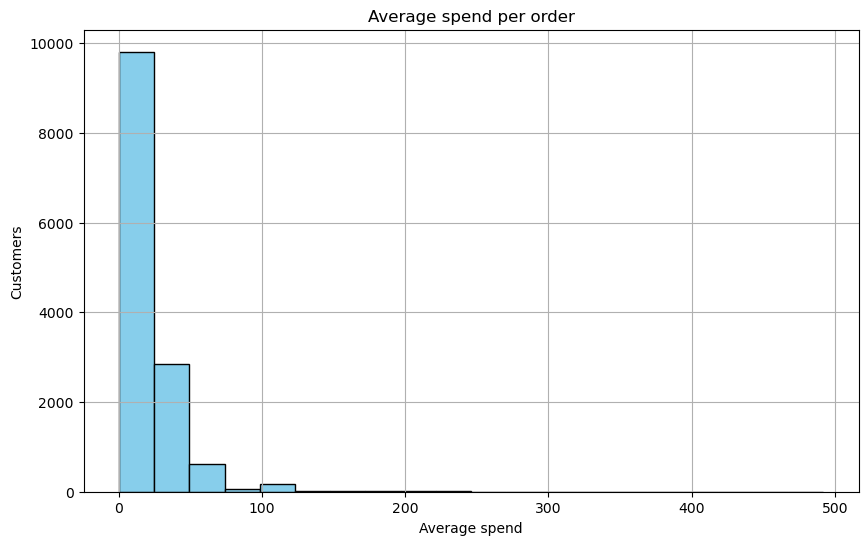

In [215]:
plt.figure(figsize=(10, 6))
plt.hist(df['Average spend per order'], bins=20, color='skyblue', edgecolor='black')
plt.title('Average spend per order')
plt.xlabel('Average spend')
plt.ylabel('Customers')
plt.grid(True)
plt.show()

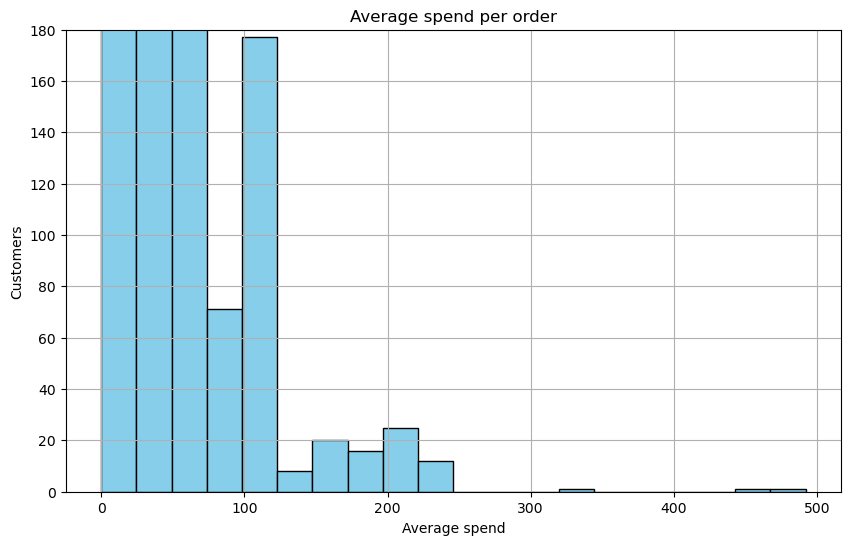

In [216]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['Average spend per order'], bins=20, color='skyblue', edgecolor='black')
plt.title('Average spend per order')
plt.xlabel('Average spend')
plt.ylabel('Customers')
plt.grid(True)

plt.ylim(0, 180)

plt.show()


### Average spend higher than 100 

In [217]:
import pandas as pd
import matplotlib.pyplot as plt

high_spend_customers = df[df['Average spend per order'] > 200]

high_spend_customer_ids = high_spend_customers['Customer ID']

high_spend_customer_ids.tolist()


["'7344258023735",
 "'7335002276151",
 "'7344336961847",
 "'7344338010423",
 "'7344338010423",
 "'7420921872695",
 "'7420922593591",
 "'7343729606967",
 "'7343729606967",
 "'7420925804855",
 "'7344006005047",
 "'7344005218615",
 "'7427239608631",
 "'7427240395063",
 "'7427240395063",
 "'7344004366647",
 "'7335034749239",
 "'7344003514679",
 "'7427344793911",
 "'7343999811895",
 "'7343998665015",
 "'7343909175607",
 "'7344343089463",
 "'7427735945527",
 "'7343757394231",
 "'7427780280631",
 "'7434844471607",
 "'7434863804727",
 "'7434929832247",
 "'7434930913591",
 "'7335057883447",
 "'7343729017143",
 "'7343729017143",
 "'7434942677303",
 "'7434944545079",
 "'7435118248247",
 "'7435122245943",
 "'7335070597431"]

In [218]:
high_spend_customer_rows = high_spend_customers
high_spend_customer_rows


,Order ID,Email,Financial Status,Paid at,Fulfillment Status,Fulfilled at,Currency,Shipping,Amount Refunded,Total,...,Financial_Binary,Fulfilled_Binary,Gender_Binary,Email_Binary,Customer Lifespan,Inner London,Outer London,Inner_London_Binary,Fulfillment Time,Average spend per order
1072,13645,gazbia.sorour@gmail.com,PAID,2023-10-05 16:18:53+01:00,FULFILLED,2023-10-06 16:36:39+01:00,GBP,0.00,0.0,28.00,...,1,1,2,1,0.000000,Yes,No,1,1 days 00:17:46,234.00
5298,12899,varsutherland@gmail.com,PAID,2023-08-19 15:15:06+01:00,FULFILLED,2023-08-24 13:07:38+01:00,GBP,0.00,0.0,19.80,...,1,1,1,0,0.000000,No,Yes,0,4 days 21:52:32,320.28
8097,9218,sarahcorbett@hotmail.fr,PAID,2023-01-11 04:07:07+00:00,FULFILLED,2023-01-16 12:15:54+00:00,GBP,0.00,0.0,240.00,...,1,1,0,0,0.000000,No,Yes,0,5 days 08:08:47,240.00
8184,9128,c.mcclelland07@gmail.com,PAID,2023-01-03 03:29:05+00:00,FULFILLED,2023-01-04 14:24:02+00:00,GBP,0.00,0.0,240.00,...,1,1,1,0,2.050650,Yes,No,1,1 days 10:54:57,213.50
8185,579,c.mcclelland07@gmail.com,PAID,2020-12-15 02:02:05+00:00,FULFILLED,2020-12-15 17:27:05+00:00,GBP,0.00,0.0,187.00,...,1,1,1,0,2.050650,Yes,No,1,0 days 15:25:00,213.50
8238,9036,lornadibble@yahoo.co.uk,PAID,2022-12-26 13:14:55+00:00,FULFILLED,2023-01-03 12:43:28+00:00,GBP,0.00,0.0,180.00,...,1,1,2,0,0.000000,No,Yes,0,7 days 23:28:33,240.00
8257,9020,loulou_96@hotmail.com,PAID,2022-12-25 08:57:04+00:00,FULFILLED,2023-01-05 12:55:11+00:00,GBP,0.00,0.0,240.00,...,1,1,2,0,0.000000,No,Yes,0,11 days 03:58:07,240.00
8280,8957,nmbooth@me.com,PAID,2022-12-20 19:49:35+00:00,FULFILLED,2022-12-22 11:36:14+00:00,GBP,0.00,0.0,240.00,...,1,1,0,0,0.982888,No,Yes,0,1 days 15:46:39,230.00
8281,3935,nmbooth@me.com,PAID,2021-12-26 11:17:17+00:00,FULFILLED,2021-12-30 09:41:48+00:00,GBP,0.00,0.0,220.00,...,1,1,0,0,0.982888,No,Yes,0,3 days 22:24:31,230.00
8291,8939,imogen.gold@gmail.com,PAID,2022-12-20 02:45:47+00:00,FULFILLED,2022-12-22 11:36:12+00:00,GBP,0.00,0.0,240.00,...,1,1,1,0,0.000000,Yes,No,1,2 days 08:50:25,454.20


## 4.8. Correlation Analysis

/var/folders/84/19q4403502b6ycn514dyj48c0000gn/T/ipykernel_29769/3430937369.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


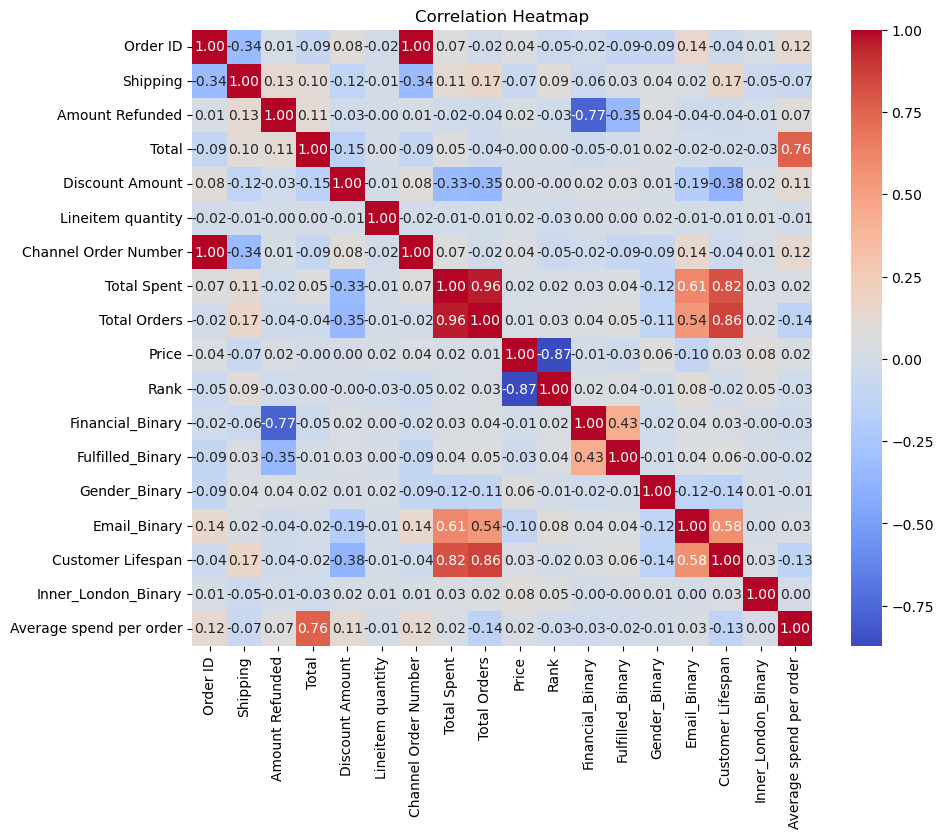

In [219]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = df.corr()

correlation_matrix = correlation_matrix.drop('Lineitem requires shipping', axis=1).drop('Lineitem requires shipping', axis=0)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


### 4.9. Merging binary variables 

In [220]:
df['Merged_binary'] = df['Financial_Binary']*8 + df['Fulfilled_Binary']*4 + df['Email_Binary']*2 + df['Inner_London_Binary']

print(df)

       Order ID                       Email Financial Status  \
0         13706          bestdocall@msn.com         refunded   
1         13527          bestdocall@msn.com             PAID   
2         13284          bestdocall@msn.com             PAID   
3         13043          bestdocall@msn.com             PAID   
4         12834          bestdocall@msn.com             PAID   
...         ...                         ...              ...   
13608         8    admin@thenutrientgap.com             PAID   
13609         7  m.g.healy42@googlemail.com             PAID   
13610         4     sarahclaing89@gmail.com             PAID   
13611         2   dan@fivetwentythree.co.uk             PAID   
13612         1   dan@fivetwentythree.co.uk             PAID   

                         Paid at Fulfillment Status  \
0      2023-10-15 15:30:25+01:00          cancelled   
1      2023-09-28 19:27:25+01:00          FULFILLED   
2      2023-09-15 15:22:06+01:00          FULFILLED   
3      2023

In [221]:
import pandas as pd

# Initialize the new variable for binary to decimal conversion
New_var = pd.Series(0, index=df.index)

# List of columns to consider for conversion
columns_to_consider = ['Financial_Binary', 'Fulfilled_Binary', 'Email_Binary', 'Inner_London_Binary']

# Filter rows based on the specified condition
condition = (
    (df['Financial_Binary'] == 1) & 
    (df['Fulfilled_Binary'] == 1) & 
    (df['Email_Binary'] == 1) & 
    (df['Inner_London_Binary'] == 1)
)


print("Rows meeting the condition:")
print(df[condition])

# Calculate the new variable based on the formula for the filtered rows
for i, column in enumerate(columns_to_consider):
    New_var += (2**i) * (df[condition][column] - 1)

# Add the new variable to the original DataFrame
df.loc[condition, 'Merged_binary'] = New_var

print("\nDataFrame with Merged_binary column:")
print(df)

Rows meeting the condition:
       Order ID                       Email Financial Status  \
265        7874  victoria.nicholl@gmail.com             PAID   
268        7266  victoria.nicholl@gmail.com             PAID   
269        6875  victoria.nicholl@gmail.com             PAID   
270        6421  victoria.nicholl@gmail.com             PAID   
271        6027  victoria.nicholl@gmail.com             PAID   
...         ...                         ...              ...   
12888      1405     samgpconnolly@gmail.com             PAID   
12889      1173     samgpconnolly@gmail.com             PAID   
12890       932     samgpconnolly@gmail.com             PAID   
13434       502        julieherbain@aol.com             PAID   
13598        34          mrnick@hotmail.com             PAID   

                         Paid at Fulfillment Status  \
265    2022-10-11 14:54:55+01:00          FULFILLED   
268    2022-08-28 18:46:39+01:00          FULFILLED   
269    2022-07-28 18:38:24+01:00      

In [222]:
print(df['Merged_binary'].head(50))

0      0
1     12
2     12
3     12
4     12
5     12
6     12
7      0
8     12
9      0
10    12
11     1
12    13
13    13
14    13
15    13
16    13
17    13
18    13
19    13
20    13
21     5
22     0
23    12
24    12
25    12
26    12
27    12
28     2
29    14
30    14
31    14
32    14
33    14
34    14
35    14
36    14
37    14
38    14
39    14
40    14
41    14
42    14
43    14
44    14
45    14
46    14
47    14
48    14
49    14
Name: Merged_binary, dtype: int64


# 5. RFM Anlysis

## 5.1. LTV - Lifetime Value Calculaiton

In [223]:
#  average purchase value
average_purchase_value = df['Total Spent'].sum() / df['Total Orders'].sum()

#  retention time period (average customer lifespan)
customer_lifespans = df.groupby('Customer ID')['Customer Lifespan'].max()
average_customer_lifespan = customer_lifespans.mean()

# Customer Lifetime Value (LTV)
# ltv = average_purchase_value * purchase_frequency_rate * average_customer_lifespan

print(f"Average Purchase Value: {average_purchase_value}")
print(f"Average Customer Lifespan: {average_customer_lifespan} years")


Average Purchase Value: 22.904567410143486
Average Customer Lifespan: 0.21967157752931818 years


## 5.2. RCR - Returning customer rate

In [224]:
# Returning Customers
customer_orders = df.groupby('Customer ID').size()

#  customers with more than one order
returning_customers = customer_orders[customer_orders > 1].count()

# Total Number of Unique Customers
total_unique_customers = df['Customer ID'].nunique()

#RCR
rcr = (returning_customers / total_unique_customers) * 100

print(f"Returning Customer Rate (RCR): {rcr:.2f}%")

Returning Customer Rate (RCR): 33.09%


In [225]:
from sklearn.cluster import KMeans
import pandas as pd
selected_features = ['Total Spent', 'Total Orders', 'Customer Lifespan']

# Extract the selected features
X = df[selected_features]

# Initialize the KMeans model with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)

# Fit the model to the data
kmeans.fit(X)

# cluster labels to the DataFrame
df['Cluster'] = kmeans.labels_

# data points in each cluster
print(df['Cluster'].value_counts())



0    10047
1     3566
Name: Cluster, dtype: int64


# 6. Clustering

# 7. Univariate Analysis

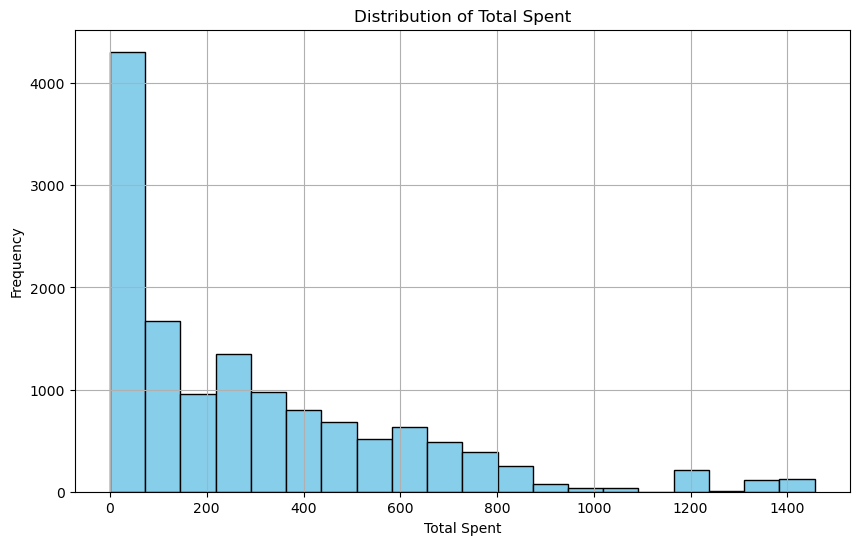

In [226]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.hist(df['Total Spent'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Total Spent')
plt.xlabel('Total Spent')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [227]:
# Summary 
total_spent_mean = df['Total Spent'].mean()
total_spent_median = df['Total Spent'].median()
total_spent_mode = df['Total Spent'].mode()[0]
total_spent_std = df['Total Spent'].std()

print("Summary Statistics for Total Spent:")
print("Mean:", total_spent_mean)
print("Median:", total_spent_median)
print("Mode:", total_spent_mode)
print("Standard Deviation:", total_spent_std)
print()

Summary Statistics for Total Spent:
Mean: 296.0869205906119
Median: 203.88
Mode: 22.0
Standard Deviation: 305.9401201428269



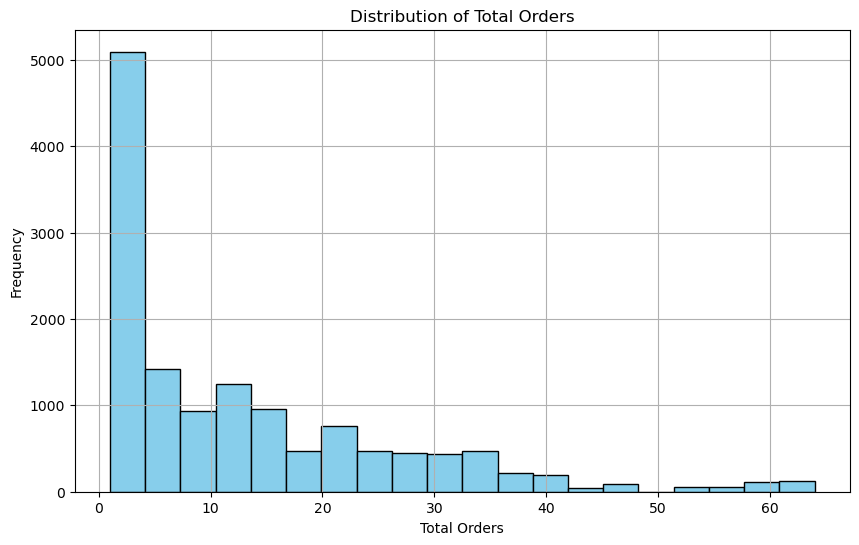

In [228]:

plt.figure(figsize=(10, 6))
plt.hist(df['Total Orders'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Total Orders')
plt.xlabel('Total Orders')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [229]:
# Summary 
total_orders_mean = df['Total Orders'].mean()
total_orders_median = df['Total Orders'].median()
total_orders_mode = df['Total Orders'].mode()[0]
total_orders_std = df['Total Orders'].std()

print("Summary Statistics for Total Orders:")
print("Mean:", total_orders_mean)
print("Median:", total_orders_median)
print("Mode:", total_orders_mode)
print("Standard Deviation:", total_orders_std)

Summary Statistics for Total Orders:
Mean: 12.926981561742451
Median: 8.0
Mode: 1
Standard Deviation: 13.448652416228535


#  8. Multivariate Analysis 

In [ ]:
# Selecting numeric columns for multivariate analysis
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Multivariate Analysis: Pair Plot
sns.pairplot(numeric_columns)
plt.suptitle('Pairwise Relationships between Numeric Variables', y=1.02)
plt.show()

# 9. Temporal Analysis

In [ ]:
##NOT SCALED 

df['Date'] = pd.date_range(start='2020-01-01', periods=len(df))

# Grouping by date and aggregating Total Spent and Total Orders
daily_data = df.groupby('Date').agg({'Total Spent': 'sum', 'Total Orders': 'sum'})

# Temporal Analysis: Total Spent and Total Orders over time
plt.figure(figsize=(10, 6))
plt.plot(daily_data.index, daily_data['Total Spent'], label='Total Spent', color='blue')
plt.plot(daily_data.index, daily_data['Total Orders'], label='Total Orders', color='green')
plt.title('Temporal Analysis: Total Spent and Total Orders over Time')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#Segmentational analysis but proportional 
import matplotlib.pyplot as plt
import pandas as pd

import matplotlib.pyplot as plt
import pandas as pd

# by date 
daily_data = df.groupby('Date').agg({'Total Spent': 'sum', 'Total Orders': 'sum'})

# Temporal Analysis
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Total Spent', color=color)
ax1.plot(daily_data.index, daily_data['Total Spent'], color=color, label='Total Spent', linestyle='-')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx() 

color = 'tab:pink'
ax2.set_ylabel('Total Orders', color=color) 
ax2.plot(daily_data.index, daily_data['Total Orders'], color=color, label='Total Orders', linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.title('Temporal Analysis: Total Spent and Total Orders over Time')
fig.legend(loc="upper left")
plt.show()



In [ ]:
import matplotlib.dates as mdates

df['Date'] = pd.to_datetime(df['Date'])

start_date = pd.Timestamp('2020-01-01')
end_date = pd.Timestamp('2023-12-31')
df_filtered = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Group by date to get the total spend and total orders
daily_data = df_filtered.groupby('Date').agg({'Total Spent': 'sum', 'Total Orders': 'sum'})


fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Total Spent', color=color)
ax1.plot(daily_data.index, daily_data['Total Spent'], color=color, label='Total Spent', linestyle='-')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx() 
color = 'tab:pink'
ax2.set_ylabel('Total Orders', color=color) 
ax2.plot(daily_data.index, daily_data['Total Orders'], color=color, label='Total Orders', linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)


ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1)) 
ax1.xaxis.set_minor_locator(mdates.MonthLocator())  
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m')) 


plt.xticks(rotation=90)  

#PLOT
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)  
ax1.xaxis.set_tick_params(which='minor', bottom=False)  
ax1.xaxis.set_tick_params(which='major', pad=15)  

fig.tight_layout()  
plt.title('Temporal Analysis: Total Spent and Total Orders over Time')
fig.legend(loc="upper left")
plt.subplots_adjust(bottom=0.2)  


for tick in ax1.get_xticklabels():
    tick.set_rotation(90)

plt.show()


### Added dates

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates  # Importing matplotlib dates module
import pandas as pd
import numpy as np  # Optional, if you need to generate example data


# Grouping by date
daily_data = df.groupby('Date').agg({'Total Spent': 'sum', 'Total Orders': 'sum'})

# Temporal Analysis plot
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Total Spent', color=color)
ax1.plot(daily_data.index, daily_data['Total Spent'], color=color, label='Total Spent', linestyle='-')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx() 

color = 'tab:pink'
ax2.set_ylabel('Total Orders', color=color) 
ax2.plot(daily_data.index, daily_data['Total Orders'], color=color, label='Total Orders', linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.title('Temporal Analysis: Total Spent and Total Orders over Time')
fig.legend(loc="upper left")

# Formatting x-axis with real dates
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Adjust date format as needed
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()



# Other visualisations 

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['Merged_binary'], bins=20, color='skyblue', edgecolor='black')
plt.title('Average spend per order')
plt.xlabel('Pounds')
plt.ylabel('Customers')
plt.grid(True)
plt.show()

In [ ]:
df.to_csv('cleaned_merged_final0402.csv', index=False)

# 10. Clustering 

## Prepare datasets

### What we are clustering (all variables)

In [ ]:
# columns for clustering
all_cluster_df = df[['Amount Refunded', 'Total', 'Discount Amount', 'Total Spent', 'Total Orders', 
                     'Price', 'Rank', 'Financial_Binary', 'Fulfilled_Binary', 'Gender_Binary', 
                     'Email_Binary', 'Customer Lifespan', 'Inner_London_Binary', 'Average spend per order', 
                     'Merged_binary']]


In [ ]:
# IQR for each column
Q1 = all_cluster_df.quantile(0.25)
Q3 = all_cluster_df.quantile(0.75)
IQR = Q3 - Q1

#  lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the rows with outliers
all_cluster_df = all_cluster_df[~((all_cluster_df < lower_bound) | (all_cluster_df > upper_bound)).any(axis=1)]

print(all_cluster_df)

### What we are clustering (Alice variables)

In [ ]:
# columns for clustering
selected_cluster_df = df[['Email_Binary', 'Customer Lifespan', 'Discount Amount', 'Inner_London_Binary', 'Total Spent', 'Rank', 'Merged_binary']]
selected_cluster_df

In [ ]:
Q1 = all_cluster_df.quantile(0.25)
Q3 = all_cluster_df.quantile(0.75)
IQR = Q3 - Q1

#  lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# rows with outliers
selected_cluster_df = selected_cluster_df[~((selected_cluster_df < lower_bound) | (selected_cluster_df > upper_bound)).any(axis=1)]


print(selected_cluster_df)

## Number of cluster n 

### Elbow method

### For all variables 

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from sklearn.impute import SimpleImputer

#mputer object with a strategy
imputer = SimpleImputer(strategy='mean')

#imputer to the data and transform the data
all_cluster_df = pd.DataFrame(imputer.fit_transform(all_cluster_df), columns=all_cluster_df.columns)


data = all_cluster_df


def plot_elbow_method(all_cluster_df, max_clusters=10):
    wcss = []
    for i in range(1, max_clusters+1):
        kmeans = KMeans(n_clusters=i, random_state=42)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_clusters+1), wcss, 'bo-')
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()

plot_elbow_method(all_cluster_df)


### For selected  

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from sklearn.impute import SimpleImputer

#imputer object with a strategy 
imputer = SimpleImputer(strategy='mean')

#imputer to the data and transform the data
selected_cluster_df = pd.DataFrame(imputer.fit_transform(selected_cluster_df), columns=selected_cluster_df.columns)


data = selected_cluster_df


def plot_elbow_method(selected_cluster_df, max_clusters=10):
    wcss = []
    for i in range(1, max_clusters+1):
        kmeans = KMeans(n_clusters=i, random_state=42)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_clusters+1), wcss, 'bo-')
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()

plot_elbow_method(selected_cluster_df)

### Silhouette score

### For all variables

In [ ]:
from sklearn.metrics import silhouette_score

def plot_silhouette_scores(all_cluster_df, max_clusters=10):
    silhouette_scores = []
    for i in range(2, max_clusters+1):
        kmeans = KMeans(n_clusters=i, random_state=42)
        cluster_labels = kmeans.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        silhouette_scores.append(silhouette_avg)
    plt.figure(figsize=(10, 6))
    plt.plot(range(2, max_clusters+1), silhouette_scores, 'bo-')
    plt.title('Silhouette Scores for Various Clusters')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.show()

plot_silhouette_scores(all_cluster_df)

### For selected clusters 

In [ ]:
from sklearn.metrics import silhouette_score

def plot_silhouette_scores(selected_cluster_df, max_clusters=10):
    silhouette_scores = []
    for i in range(2, max_clusters+1):
        kmeans = KMeans(n_clusters=i, random_state=42)
        cluster_labels = kmeans.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        silhouette_scores.append(silhouette_avg)
    plt.figure(figsize=(10, 6))
    plt.plot(range(2, max_clusters+1), silhouette_scores, 'bo-')
    plt.title('Silhouette Scores for Various Clusters')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.show()

plot_silhouette_scores(selected_cluster_df)

# 11. Clustering techniques

## 11.1. Kmeans 

### All variables 

In [ ]:
print("Columns in all_cluster_df:", all_cluster_df.columns)
print("Shape of all_cluster_df:", all_cluster_df.shape)


In [ ]:
data = all_cluster_df

# Standardize 
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Standardize 
scaler = StandardScaler()
scaled_data = scaler.fit_transform(all_cluster_df)

# number of clusters
num_clusters = 3

# KMeans clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(scaled_data)

# Assign the cluster labels
all_cluster_df['cluster_Kmeans_all'] = kmeans.labels_

# Get the cluster centers and inverse transform them back to the original scale
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)


# Debugging 
print("Columns in all_cluster_df:", all_cluster_df.columns)
print("Shape of all_cluster_df:", all_cluster_df.shape)
print("Shape of cluster_centers:", cluster_centers.shape)

# Adjust 
if cluster_centers.shape[1] == len(all_cluster_df.columns) - 1:
    columns_for_centers = all_cluster_df.columns[:-1]
elif cluster_centers.shape[1] == len(all_cluster_df.columns):
    columns_for_centers = all_cluster_df.columns
else:
    raise ValueError(f"Mismatch in column sizes: {cluster_centers.shape[1]} vs {len(all_cluster_df.columns)}")


cluster_centers_df = pd.DataFrame(cluster_centers, columns=columns_for_centers)

print("Cluster Centers:")
print(cluster_centers_df)

In [ ]:
print("Shape of cluster_centers:", cluster_centers.shape)


In [ ]:
#samples in each cluster
print("\nCluster Counts:")
print(all_cluster_df['cluster_Kmeans_all'].value_counts())

In [ ]:
#  KMeans  on the cleaned data
kmeans = KMeans(n_clusters=3, random_state=42)
all_cluster_df['cluster_Kmeans_all'] = kmeans.fit_predict(all_cluster_df)


print(all_cluster_df.head())

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# PCA with 3 components
pca = PCA(n_components=3)
principal_components = pca.fit_transform(all_cluster_df)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])

pca_df['Cluster'] = all_cluster_df['cluster_Kmeans_all']

# Number of clusters
num_clusters = all_cluster_df['cluster_Kmeans_all'].nunique()

# fixed color mapping
color_mapping = {
    0: 'red',
    1: 'blue',
    2: 'green',
    # Add more mappings if you have more clusters
}

# plotting
fig = plt.figure(figsize=(12, 13))
ax = fig.add_subplot(111, projection='3d')

for cluster_label in range(num_clusters):
    cluster_data = pca_df[pca_df['Cluster'] == cluster_label]
    ax.scatter(cluster_data['PC1'], cluster_data['PC2'], cluster_data['PC3'], label=f'Cluster {cluster_label}', alpha=0.6, edgecolors='w', s=100)

ax.set_title('KMeans Clustering Visualization using 3D PCA')
ax.set_xlabel('Customer engagement')
ax.set_ylabel('Higher prices')
ax.set_zlabel('Discount Amount')
ax.legend()
plt.show()

In [ ]:
# import pandas as pd
# from sklearn.cluster import KMeans
# from sklearn.preprocessing import StandardScaler
# import matplotlib.pyplot as plt
# from sklearn.decomposition import PCA


# # Standardize
# scaler = StandardScaler()
# scaled_data = scaler.fit_transform(all_cluster_df)

# # KMeans 
# num_clusters = 3
# kmeans = KMeans(n_clusters=num_clusters, random_state=42)
# kmeans.fit(scaled_data)
# all_cluster_df['cluster_Kmeans_all'] = kmeans.labels_

# # cluster centers and inverse transform them to the original scale
# cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
# columns_for_centers = all_cluster_df.columns[:-1]  
# cluster_centers_df = pd.DataFrame(cluster_centers, columns=columns_for_centers)
# print("Cluster Centers:")
# print(cluster_centers_df)

# # PCA with 3 components
# pca = PCA(n_components=3)
# principal_components = pca.fit_transform(all_cluster_df.drop(columns=['cluster_Kmeans_all']))
# pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])
# pca_df['Cluster'] = all_cluster_df['cluster_Kmeans_all']

# # Plotting 
# fig = plt.figure(figsize=(12, 10))
# ax = fig.add_subplot(111, projection='3d')

# color_mapping = {0: 'red', 1: 'blue', 2: 'green'}

# for cluster_label in range(num_clusters):
#     cluster_data = pca_df[pca_df['Cluster'] == cluster_label]
#     ax.scatter(cluster_data['PC1'], cluster_data['PC2'], cluster_data['PC3'],
#                label=f'Cluster {cluster_label}', alpha=0.6, edgecolors='w', s=100)

# ax.set_title('KMeans Clustering Visualization using 3D PCA')
# ax.set_xlabel('PCA 1')
# ax.set_ylabel('PCA 2')
# ax.set_zlabel('PCA 3')
# ax.legend()
# plt.show()


### Check PCA

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize
scaler = StandardScaler()
scaled_data = scaler.fit_transform(all_cluster_df)

#  PCA
pca = PCA(n_components=3)
principal_components = pca.fit_transform(scaled_data)

# Create a DataFrame with principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])

# Compute the correlations between the original variables and the principal components
correlation_matrix = np.corrcoef(scaled_data.T, principal_components.T)[:len(all_cluster_df.columns), len(all_cluster_df.columns):]

# Create a DataFrame for easier interpretation
correlation_df = pd.DataFrame(correlation_matrix, index=all_cluster_df.columns, columns=['PC1', 'PC2', 'PC3'])

print("Correlation Matrix between Original Variables and Principal Components:")
print(correlation_df)

# Add cluster labels to pca_df for plotting
pca_df['Cluster'] = all_cluster_df['cluster_Kmeans_all']

# Interpretation of principal components based on correlations
for i in range(1, 4):
    print(f"\nPrincipal Component {i} (PC{i}) Interpretation:")
    pc_correlations = correlation_df[f'PC{i}']
    sorted_correlations = pc_correlations.abs().sort_values(ascending=False)
    for variable in sorted_correlations.index:
        correlation_value = pc_correlations[variable]
        print(f"{variable}: {correlation_value:.3f}")


### Check common characteristics (All)

In [ ]:
#key statistics
for cluster in range(num_clusters):
    print(f'\nCluster {cluster} Statistics:')
    display(all_cluster_df[all_cluster_df['cluster_Kmeans_all'] == cluster].describe())

### Selected variables 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
data = selected_cluster_df

# Standardize 
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

#number of clusters
num_clusters = 3

# fixed color mapping
color_mapping = {
    0: 'red',
    1: 'blue',
    2: 'green',
   
}

# KMeans 
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(scaled_data)

#  cluster labels to the DataFrame
selected_cluster_df['cluster_Kmeans_selected'] = kmeans.labels_


cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)

# Debugging 
print("Columns in selected_cluster_df:", selected_cluster_df.columns)
print("Shape of selected_cluster_df:", selected_cluster_df.shape)
print("Shape of cluster_centers:", cluster_centers.shape)

# Adjust to shape of cluster_centers
if cluster_centers.shape[1] == len(selected_cluster_df.columns) - 1:
    columns_for_centers = selected_cluster_df.columns[:-1]
elif cluster_centers.shape[1] == len(selected_cluster_df.columns):
    columns_for_centers = selected_cluster_df.columns
else:
    raise ValueError(f"Mismatch in column sizes: {cluster_centers.shape[1]} vs {len(selected_cluster_df.columns)}")

# Create the DataFrame
cluster_centers_df = pd.DataFrame(cluster_centers, columns=columns_for_centers)

print("Cluster Centers:")
print(cluster_centers_df)

In [ ]:

print("\nCluster Counts:")
print(selected_cluster_df['cluster_Kmeans_selected'].value_counts())

In [ ]:


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

# Reduce data dimensionality
pca = PCA(n_components=3)
reduced_data = pca.fit_transform(scaled_data)

# Plotting 
fig = plt.figure(figsize=(12, 13))
ax = fig.add_subplot(111, projection='3d')

for cluster_label in range(num_clusters):
    cluster_data = reduced_data[selected_cluster_df['cluster_Kmeans_selected'] == cluster_label]
    ax.scatter(cluster_data[:, 0], cluster_data[:, 1], cluster_data[:, 2], label=f'Cluster {cluster_label}', alpha=0.6, edgecolors='w', s=100)

ax.set_title('KMeans Clustering Visualization using 3D PCA')
ax.set_xlabel('Customer enagagement')
ax.set_ylabel('Total Spent')
ax.set_zlabel('Rank')
ax.legend()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize 
scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_cluster_df.drop(columns=['cluster_Kmeans_selected']))

#  PCA
pca = PCA(n_components=3)
principal_components = pca.fit_transform(scaled_data)

# Create a DataFrame with principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])

# correlations 
correlation_matrix = np.corrcoef(scaled_data.T, principal_components.T)[:len(selected_cluster_df.columns)-1, len(selected_cluster_df.columns)-1:]

# new DataFrame
correlation_df = pd.DataFrame(correlation_matrix, index=selected_cluster_df.columns[:-1], columns=['PC1', 'PC2', 'PC3'])

print("Correlation Matrix between Original Variables and Principal Components:")
print(correlation_df)

# Add cluster labels to pca_df for plotting
pca_df['Cluster'] = selected_cluster_df['cluster_Kmeans_selected']

# Interpretation
for i in range(1, 4):
    print(f"\nPrincipal Component {i} (PC{i}) Interpretation:")
    pc_correlations = correlation_df[f'PC{i}']
    sorted_correlations = pc_correlations.abs().sort_values(ascending=False)
    for variable in sorted_correlations.index:
        correlation_value = pc_correlations[variable]
        print(f"{variable}: {correlation_value:.3f}")


In [ ]:
for cluster in range(num_clusters):
    print(f'\nCluster {cluster} Statistics:')
    display(selected_cluster_df[selected_cluster_df['cluster_Kmeans_selected'] == cluster].describe())

## 11.2. BIRCH clustering 

### All variables

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import Birch
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

# Standardize 
scaler = StandardScaler()
scaled_data = scaler.fit_transform(all_cluster_df)

# BIRCH clustering
birch_model = Birch(threshold=0.01, n_clusters=3)  # Adjust threshold and number of clusters as needed
birch_model.fit(scaled_data)
clusters = birch_model.predict(scaled_data)

# Add  
all_cluster_df['cluster_BIRCH_all'] = clusters

# Reduce data dimensionality 
pca = PCA(n_components=3)
reduced_data = pca.fit_transform(scaled_data)

# color mapping
color_mapping = {
    0: 'red',
    1: 'blue',
    2: 'green',
    
}

# Plotting 
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

for cluster_label in np.unique(clusters):
    cluster_data = reduced_data[clusters == cluster_label]
    ax.scatter(cluster_data[:, 0], cluster_data[:, 1], cluster_data[:, 2], label=f'Cluster {cluster_label}', alpha=0.6, edgecolors='w', s=100)

ax.set_title('BIRCH Clustering Visualization using 3D PCA')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
ax.legend()
plt.show()


In [ ]:
cluster_counts = all_cluster_df['cluster_BIRCH_all'].value_counts()
print("Cluster Counts:")
print(cluster_counts)

In [ ]:
print("Sample data with cluster labels:")
print(all_cluster_df.head())

In [ ]:
for cluster in range(num_clusters):
    print(f'\nCluster {cluster} Statistics:')
    display(all_cluster_df[all_cluster_df['cluster_Kmeans_all'] == cluster].describe())

### Check PCA

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import Birch
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

# Standardize 
scaler = StandardScaler()
scaled_data = scaler.fit_transform(all_cluster_df.drop(columns=['cluster_BIRCH_all'], errors='ignore'))

# BIRCH
birch_model = Birch(threshold=0.01, n_clusters=3)  # Adjust threshold and number of clusters as needed
birch_model.fit(scaled_data)
clusters = birch_model.predict(scaled_data)

# Add
all_cluster_df['cluster_BIRCH_all'] = clusters

#PCA
pca = PCA(n_components=3)
principal_components = pca.fit_transform(scaled_data)

# Create  df
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])

# correlations
correlation_matrix = np.corrcoef(scaled_data.T, principal_components.T)[:scaled_data.shape[1], scaled_data.shape[1]:]

correlation_df = pd.DataFrame(correlation_matrix, index=all_cluster_df.columns[:-1], columns=['PC1', 'PC2', 'PC3'])

print("Correlation Matrix between Original Variables and Principal Components:")
print(correlation_df)

# Add 
pca_df['Cluster'] = clusters

# Plotting 
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

color_mapping = {
    0: 'red',
    1: 'blue',
    2: 'green',
}

for cluster_label in np.unique(clusters):
    cluster_data = pca_df[pca_df['Cluster'] == cluster_label]
    ax.scatter(cluster_data['PC1'], cluster_data['PC2'], cluster_data['PC3'], 
               label=f'Cluster {cluster_label}', alpha=0.6, edgecolors='w', s=100, c=color_mapping[cluster_label])

ax.set_title('BIRCH Clustering Visualization using 3D PCA')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
ax.legend()
plt.show()


### Selected features 

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import Birch
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd

# Standardise
scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_cluster_df)

#  BIRCH 
birch_model = Birch(threshold=0.01, n_clusters=3)  
birch_model.fit(scaled_data)
clusters = birch_model.predict(scaled_data)

# Add
selected_cluster_df['cluster_BIRCH_selected'] = clusters

# Reduce dimensionality 
pca = PCA(n_components=3)
reduced_data = pca.fit_transform(scaled_data)

# Color mapping
color_mapping = {
    0: 'red',
    1: 'blue',
    2: 'green',
   
}

# Plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

for cluster_label in np.unique(clusters):
    cluster_data = reduced_data[clusters == cluster_label]
    ax.scatter(cluster_data[:, 0], cluster_data[:, 1], cluster_data[:, 2], label=f'Cluster {cluster_label}', alpha=0.6, edgecolors='w', s=100)

ax.set_title('BIRCH Clustering Visualization using 3D PCA')
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
ax.legend()
plt.show()


In [ ]:
cluster_counts = selected_cluster_df['cluster_BIRCH_selected'].value_counts()
print("Cluster Counts:")
print(cluster_counts)

In [ ]:
for cluster in range(num_clusters):
    print(f'\nCluster {cluster} Statistics:')
    display(selected_cluster_df[selected_cluster_df['cluster_Kmeans_selected'] == cluster].describe())

### Check PCA

In [ ]:
for i in range(1, 4):
    print(f"\nPrincipal Component {i} (PC{i}) Interpretation:")
    pc_correlations = correlation_df[f'PC{i}']
    sorted_correlations = pc_correlations.abs().sort_values(ascending=False)
    for variable in sorted_correlations.index:
        correlation_value = pc_correlations[variable]
        print(f"{variable}: {correlation_value:.3f}")


## 11.3. DBSCAN 

In [ ]:
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt

In [ ]:
neighbors = NearestNeighbors(n_neighbors=20)
neighbors_fit = neighbors.fit(all_cluster_df)
distances, indices = neighbors_fit.kneighbors(all_cluster_df)

In [ ]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

### All features

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# Normalize 
scaler = StandardScaler()
scaled_data = scaler.fit_transform(all_cluster_df)

#  DBSCAN 
eps = 3.5  
min_samples = 10 
db = DBSCAN(eps=eps, min_samples=min_samples).fit(scaled_data)
all_cluster_df['cluster_DBSCAN_all'] = db.labels_

#  outliers 
filtered_df = all_cluster_df[all_cluster_df['cluster_DBSCAN_all'] != -1]

# color mapping
color_mapping = {
    0: 'red',
    1: 'blue',
    2: 'green',
   
}

#  PCA 
pca = PCA(n_components=3)
pca_data = pca.fit_transform(scaled_data)

# Add 
pca_df = pd.DataFrame(data=pca_data, columns=['PCA1', 'PCA2', 'PCA3'])
pca_df['cluster_DBSCAN_all'] = all_cluster_df['cluster_DBSCAN_all']

# Plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

for cluster_label in pca_df['cluster_DBSCAN_all'].unique():
    if cluster_label == -1:
        continue  # Skip outliers
    cluster_data = pca_df[pca_df['cluster_DBSCAN_all'] == cluster_label]
    ax.scatter(cluster_data['PCA1'], cluster_data['PCA2'], cluster_data['PCA3'], label=f'Cluster {cluster_label}', s=100)


outliers = pca_df[pca_df['cluster_DBSCAN_all'] == -1]
ax.scatter(outliers['PCA1'], outliers['PCA2'], outliers['PCA3'], label='Outliers', c='k', s=10)


ax.set_title('DBSCAN Clustering Visualization in 3D PCA Space')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
ax.legend()


plt.tight_layout()
plt.show()


In [ ]:
cluster_counts = filtered_df['cluster_DBSCAN_all'].value_counts()
print("Cluster Counts:")
print(cluster_counts)

print("Sample data with cluster labels:")
print(filtered_df.head())

In [ ]:
for cluster in range(num_clusters):
    print(f'\nCluster {cluster} Statistics:')
    display(all_cluster_df[all_cluster_df['cluster_DBSCAN_all'] == cluster].describe())

### Selected features

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# Normalize 
scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_cluster_df)

#  DBSCAN 
eps = 3.5  
min_samples = 15  
db = DBSCAN(eps=eps, min_samples=min_samples).fit(scaled_data)
selected_cluster_df['cluster_DBSCAN_selected'] = db.labels_

# outliers 
filtered_df = selected_cluster_df[selected_cluster_df['cluster_DBSCAN_selected'] != -1]

#  PCA 
pca = PCA(n_components=3)
pca_data = pca.fit_transform(scaled_data)

# Add 
pca_df = pd.DataFrame(data=pca_data, columns=['PCA1', 'PCA2', 'PCA3'])
pca_df['cluster_DBSCAN_selected'] = selected_cluster_df['cluster_DBSCAN_selected']

# Plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')


for cluster_label in pca_df['cluster_DBSCAN_selected'].unique():
    if cluster_label == -1:
        continue  
    cluster_data = pca_df[pca_df['cluster_DBSCAN_selected'] == cluster_label]
    ax.scatter(cluster_data['PCA1'], cluster_data['PCA2'], cluster_data['PCA3'], label=f'Cluster {cluster_label}', s=100)

# color mapping
color_mapping = {
    0: 'red',
    1: 'blue',
    2: 'green',
   
}


outliers = pca_df[pca_df['cluster_DBSCAN_selected'] == -1]
ax.scatter(outliers['PCA1'], outliers['PCA2'], outliers['PCA3'], label='Outliers', c='k', s=10)


ax.set_title('DBSCAN Clustering Visualization in 3D PCA Space (selected_cluster_df)')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
ax.legend()


plt.tight_layout()
plt.show()


In [ ]:
for cluster in range(num_clusters):
    print(f'\nCluster {cluster} Statistics:')
    display(selected_cluster_df[selected_cluster_df['cluster_DBSCAN_selected'] == cluster].describe())

## 11.4. Mean shift

In [ ]:
import pandas as pd
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Standardize 
scaler = StandardScaler()
scaled_data = scaler.fit_transform(all_cluster_df)

#bandwidth
bandwidth = estimate_bandwidth(scaled_data, quantile=0.2, n_samples=500)

# MeanShift 
meanshift = MeanShift(bandwidth=bandwidth)
meanshift.fit(scaled_data)

#Add
all_cluster_df['cluster_Meanshift_all'] = meanshift.labels_


In [ ]:
# Reduce data dimensionality
pca = PCA(n_components=3)
reduced_data = pca.fit_transform(scaled_data)


pca_df = pd.DataFrame(data=reduced_data, columns=['PCA1', 'PCA2', 'PCA3'])
pca_df['cluster_Meanshift_all'] = all_cluster_df['cluster_Meanshift_all']

# nr of clusters
num_clusters = pca_df['cluster_Meanshift_all'].nunique()

# color mapping
color_mapping = {
    0: 'red',
    1: 'blue',
    2: 'green',
   
}

# Plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

for cluster_label in range(num_clusters):
    cluster_data = pca_df[pca_df['cluster_Meanshift_all'] == cluster_label]
    ax.scatter(cluster_data['PCA1'], cluster_data['PCA2'], cluster_data['PCA3'], label=f'Cluster {cluster_label}', alpha=0.6, edgecolors='w', s=100)

ax.set_title('MeanShift Clustering Visualization using 3D PCA')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
ax.legend()
plt.show()

In [ ]:
cluster_counts = all_cluster_df['cluster_Meanshift_all'].value_counts()
print("Cluster Counts:")
print(cluster_counts)
print("Sample data with cluster labels:")
print(all_cluster_df.head())

In [ ]:
for cluster in range(num_clusters):
    print(f'\nCluster {cluster} Statistics:')
    display(all_cluster_df[all_cluster_df['cluster_Kmeans_all'] == cluster].describe())

### Selected features MeanShift 

In [ ]:
import pandas as pd
from sklearn.cluster import MeanShift
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# Standardize
scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_cluster_df)

bandwidth = 3.5  


meanshift = MeanShift(bandwidth=bandwidth)
meanshift.fit(scaled_data)


selected_cluster_df['cluster_Meanshift_selected'] = meanshift.labels_



In [ ]:
# Reduce data dimensionality 
pca = PCA(n_components=3)
reduced_data = pca.fit_transform(scaled_data)


pca_df = pd.DataFrame(data=reduced_data, columns=['PCA1', 'PCA2', 'PCA3'])
pca_df['cluster_Meanshift_selected'] = selected_cluster_df['cluster_Meanshift_selected']

# nr of clusters
num_clusters = pca_df['cluster_Meanshift_selected'].nunique()

# color mapping
color_mapping = {
    0: 'red',
    1: 'blue',
    2: 'green',

}

# Plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

for cluster_label in range(num_clusters):
    cluster_data = pca_df[pca_df['cluster_Meanshift_selected'] == cluster_label]
    ax.scatter(cluster_data['PCA1'], cluster_data['PCA2'], cluster_data['PCA3'], label=f'Cluster {cluster_label}', alpha=0.6, edgecolors='w', s=100)

ax.set_title('MeanShift Clustering Visualization using 3D PCA')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
ax.legend()
plt.show()

In [ ]:
cluster_counts = selected_cluster_df['cluster_Meanshift_selected'].value_counts()
print("Cluster Counts:")
print(cluster_counts)

print("Sample data with cluster labels:")
print(selected_cluster_df.head())

In [ ]:
for cluster in range(num_clusters):
    print(f'\nCluster {cluster} Statistics:')
    display(selected_cluster_df[selected_cluster_df['cluster_Meanshift_selected'] == cluster].describe())

## 11.5. Hierarchal clutstering

### All features

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist
import numpy as np

data = all_cluster_df.dropna()

# Normalise
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

#  hierarchical clustering
linked = linkage(scaled_data, method='ward')

# Plot
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', labels=data.index, distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

num_clusters = 4  
clusters = fcluster(linked, num_clusters, criterion='maxclust')

# Add
all_cluster_df['cluster_hierarchal_all'] = clusters

#  color mapping
color_mapping = {
    1: 'orange',
    2: 'blue',
    3: 'green',
    
}

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


num_clusters = 3

color_palette = plt.get_cmap('tab10').colors  # Use a color palette with enough distinct colors
color_mapping = {i + 1: color_palette[i % len(color_palette)] for i in range(num_clusters)}

print(f"Number of clusters: {num_clusters}")
print(f"Color mapping: {color_mapping}")
#PCA

print("Cluster labels in pca_df:", pca_df['Cluster'].unique())
#PLOT
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

for cluster_label in range(1, num_clusters + 1):
    cluster_data = pca_df[pca_df['Cluster'] == cluster_label]
    ax.scatter(cluster_data['PC1'], cluster_data['PC2'], cluster_data['PC3'], 
               label=f'Cluster {cluster_label}', 
               alpha=0.6, edgecolors='w', s=100, 
               color=color_mapping[cluster_label])

ax.set_title('Hierarchical Clustering Visualization using 3D PCA')
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
ax.legend()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist

data = all_cluster_df
# Normalize 
scaler = StandardScaler()
scaled_data = scaler.fit_transform(all_cluster_df)

#  hierarchical clustering
linked = linkage(scaled_data, method='ward')

# Plot 
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', labels=all_cluster_df.index, distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# Form cluster
num_clusters = 3  
clusters = fcluster(linked, num_clusters, criterion='maxclust')



In [ ]:
# Add 
all_cluster_df['cluster_hierarchal_all'] = clusters

# Plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Reduce data dimensionality 
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
reduced_data = pca.fit_transform(scaled_data)

#Color mapping
color_mapping = {
    0: 'red',
    1: 'blue',
    2: 'green',
   
}

# Plot
for cluster_label in range(1, num_clusters + 1):
    cluster_data = reduced_data[all_cluster_df['cluster_hierarchal_all'] == cluster_label]
    ax.scatter(cluster_data[:, 0], cluster_data[:, 1], cluster_data[:, 2], label=f'cluster_hierarchal_all {cluster_label}')

ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
ax.set_title('3D Cluster Visualization using PCA')
ax.legend()
plt.show()



In [ ]:
for cluster in range(num_clusters):
    print(f'\nCluster {cluster} Statistics:')
    display(all_cluster_df[all_cluster_df['cluster_hierarchal_all'] == cluster].describe())

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardize 
scaler = StandardScaler()
scaled_data = scaler.fit_transform(all_cluster_df)

# Perform PCA
pca = PCA(n_components=3)
principal_components = pca.fit_transform(scaled_data)

explained_variance_ratios = pca.explained_variance_ratio_
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# oiginal variables
variables = all_cluster_df.columns.tolist()
interpretation_df = pd.DataFrame(index=variables, columns=['PC1', 'PC2', 'PC3'])


for pc_idx in range(3):
    for var_idx, variable in enumerate(variables):
        interpretation_df.at[variable, f'PC{pc_idx + 1}'] = loadings[var_idx, pc_idx] * np.sqrt(explained_variance_ratios[pc_idx])

print("PCA Interpretation:")
print(interpretation_df)


# interpretation_df.to_excel('pca_interpretation_all_cluster.xlsx', index=True)


### Selected features

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist

# Normalize 
scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_cluster_df)

#  hierarchical clustering
linked = linkage(scaled_data, method='ward')

# Plot 
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', labels=selected_cluster_df.index, distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()



In [ ]:
# clusters
num_clusters = 3  
clusters = fcluster(linked, num_clusters, criterion='maxclust')

# Color mapping
color_mapping = {
    0: 'red',
    1: 'blue',
    2: 'green',
    
}

selected_cluster_df['cluster_hierarchal_selected'] = clusters

# Plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Reduce data dimensionality 
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
reduced_data = pca.fit_transform(scaled_data)

# Plot
for cluster_label in range(1, num_clusters + 1):
    cluster_data = reduced_data[selected_cluster_df['cluster_hierarchal_selected'] == cluster_label]
    ax.scatter(cluster_data[:, 0], cluster_data[:, 1], cluster_data[:, 2], label=f'selected_cluster_df {cluster_label}')

ax.set_title('Hierarchical Clustering Visualization')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
ax.legend()
ax.grid(True)
plt.show()


cluster_counts = selected_cluster_df['cluster_hierarchal_selected'].value_counts()
print("Cluster Counts:")
print(cluster_counts)

print("Sample data with cluster labels:")
print(selected_cluster_df.head())


In [ ]:
for cluster in range(num_clusters):
    print(f'\nCluster {cluster} Statistics:')
    display(selected_cluster_df[selected_cluster_df['cluster_hierarchal_selected'] == cluster].describe())

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardize
scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_cluster_df)

#  PCA
pca = PCA(n_components=3)
principal_components = pca.fit_transform(scaled_data)

#  explained variance ratios 
explained_variance_ratios = pca.explained_variance_ratio_
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Define the original variables
variables = selected_cluster_df.columns.tolist()

# df
interpretation_df = pd.DataFrame(index=variables, columns=['PC1', 'PC2', 'PC3'])

for pc_idx in range(3):
    for var_idx, variable in enumerate(variables):
        interpretation_df.at[variable, f'PC{pc_idx + 1}'] = loadings[var_idx, pc_idx] * np.sqrt(explained_variance_ratios[pc_idx])

print("PCA Interpretation:")
print(interpretation_df)

# # Excel
# interpretation_df.to_excel('pca_interpretation_selected_cluster.xlsx', index=True)
